# **Implementasi AHP dalam Pengambilan Keputusan Prioritas Pasien ICU**
---

**Objective**
Rumah sakit dengan skala besar bertujuan untuk mengoptimalkan manajemen distribusi ruang ICU. Mereka mengalami kesulitan dalam memprioritaskan pasien yang memerlukan kamar ICU, dengan mempertimbangkan beragam aspek medis dan administratif. Fokus utama mereka adalah memastikan pasien dengan kebutuhan perawatan intensif paling mendesak mendapat prioritas tertinggi, meningkatkan mutu layanan kesehatan, meminimalkan masa tunggu, serta memaksimalkan pemanfaatan fasilitas rumah sakit.

1. **Introduction**
  - **Latar Belakang Masalah**: Proyek ini terinspirasi oleh kasus di Ternate, Maluku Utara, di mana seorang pasien meninggal dunia karena penanganan yang dianggap lambat dalam memindahkan pasien ke ruang ICU. Ini menunjukkan betapa pentingnya pengambilan keputusan yang cepat dan tepat dalam situasi darurat di rumah sakit.
  - **Tujuan** Membangun sebuah sistem pendukung keputusan (DSS) berbasis AHP (Analytic Hierarchy Process) untuk membantu rumah sakit menentukan prioritas pasien yang harus segera ditangani di ICU berdasarkan berbagai kriteria.

2. **Data Collection dan Preprocessing**
  - Dataset: [Healthcare Dataset](https://www.kaggle.com/datasets/prasad22/healthcare-dataset?resource=download) , merupakan dataset publik yang mencakup informasi tentang pasien seperti nama, usia, jenis kelamin, kondisi medis, tanggal masuk, dokter, rumah sakit, penyedia asuransi, jumlah tagihan, nomor kamar, jenis penerimaan, tanggal keluar, obat-obatan, dan hasil tes dan diambil dari platform **Kaggle**.
  - Preprocessing Data meliputi:
    1. Pemeriksaan isi Data
    2. Menangani Ketidakstabilan Data
    3. Feature Engineering

3. **Exploratory Data Analysis (EDA)**
  - Analisis Statistik

4. **Model Development (AHP)**
  - Membuat Matriks Perbandingan
  - Menghitung Bobot Kriteria
  - Menghitung Bobot Sub Kriteria
  - Menghitung Nilai Prioritas (Eigenvector) dan Nilai Inconsistency (Consistency Ratio)
  - Evaluasi Alternatif

5. **Visualization**
  - Visualisasi Hasil Analisis

6. **Kesimpulan**
  - Kesimpulan Hasil Projek
---
Dibuat oleh : **David Mario**

GitHub : [DavidMarioYS](https://github.com/DavidMarioYS)

Email : davidmario484@gmail.com

## Data Collection dan Preprocessing

### Data Collection
Mengambil dataset yang sudah di download dari Kaggle di penyimpanan lokal

In [1]:
from google.colab import files
# Mengunggah file dari komputer lokal
uploaded = files.upload()

# Contoh: Menyimpan file yang diunggah ke dalam file lokal di Colab
with open('healthcare_dataset.csv', 'wb') as f:
    f.write(uploaded['healthcare_dataset.csv'])

Saving healthcare_dataset.csv to healthcare_dataset.csv


In [2]:
import pandas as pd
dataset = pd.read_csv('healthcare_dataset.csv')
dataset

Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1            2019-08-20   Samantha Davies                       Kim Inc   
2            2022-09-22  Tiffany Mitchell                      Cook PLC   
3            2020-11-18       Kevin Wells    Hernandez Rogers and Vang,   
4            2022-09-19    Kathleen Hanna                   White-White   
...                 ...               ...                           ...   
55495        2020-08-16     Joshua Jarvis                Jones-Thompson   
55496        2020-01-23   Taylor Sullivan                  Tucker-Moyer   
55497        2020-07-13    Joe Jacobs DVM  and Mahoney Johnson Vasquez,   
55498        2019-05-25    Kimberly Curry      Jackson Todd and Castro,   
55499        2024-04-02     Dennis Warren                Henry Sons and   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
0             Blue Cross    18856.281306          328         Urgent   
1               Medicare    33643.327287          265      Emergency   
2                  Aetna    27955.096079          205      Emergency   
3               Medicare    37909.782410          450       Elective   
4                  Aetna    14238.317814          458         Urgent   
...                  ...             ...          ...            ...   
55495         Blue Cross     2650.714952          417       Elective   
55496              Cigna    31457.797307          316       Elective   
55497   UnitedHealthcare    27620.764717          347         Urgent   
55498           Medicare    32451.092358          321       Elective   
55499              Aetna     4010.134172          448         Urgent   

      Discharge Date   Medication  Test Results  
0         2024-02-02  Paracetamol        Normal  
1         2019-08-26    Ibuprofen  Inconclusive  
2         2022-10-07      Aspirin        Normal  
3         2020-12-18    Ibuprofen      Abnormal  
4         2022-10-09   Penicillin      Abnormal  
...              ...          ...           ...  
55495     2020-09-15   Penicillin      Abnormal  
55496     2020-02-01      Aspirin        Normal  
55497     2020-08-10    Ibuprofen      Abnormal  
55498     2019-05-31    Ibuprofen      Abnormal  
55499     2024-04-29    Ibuprofen      Abnormal  

[55500 rows x 15 columns]

### Data Preprocessing

1. Pemeriksaan isi Data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
dataset.describe()

Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000

In [5]:
# Mengecek data duplikat
dataset.duplicated().sum()

534

2. Menangani Ketidakstabilan Data

In [6]:
# Menghapus baris duplikat
dataset.drop_duplicates(inplace=True)

# Mengecek kembali data duplikat
dataset.duplicated().sum()

0

In [7]:
# Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom setelah pembersihan:")
print(dataset.shape)

Jumlah baris dan kolom setelah pembersihan:
(54966, 15)


3. Feature Engineering

In [8]:
from sklearn.preprocessing import LabelEncoder

# Kategorikan 'Medical Condition' ke dalam sub-kriteria
dataset['Medical Condition Category'] = dataset['Medical Condition'].apply(lambda x: 'Chronic Disease'
                                                                           if x in ['Arthritis',
                                                                                    'Cancer',
                                                                                    'Diabetes',
                                                                                    'Hypertension',
                                                                                    'Obesity']
                                                                           else 'Acute Condition')

# Kategorikan 'Age' ke dalam sub-kriteria
bins = [0, 18, 60, 100]  # Batas umur
labels = ['Children', 'Adults', 'Elderly']
dataset['Age Category'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

# Kategorikan 'Billing Amount'
billing_amount_bins = [0, 10000, 30000, float('inf')]  # Batas tagihan
billing_amount_labels = ['Below Average', 'Average', 'Above Average']
dataset['Billing Amount Category'] = pd.cut(dataset['Billing Amount'],
                                            bins=billing_amount_bins,
                                            labels=billing_amount_labels)

# Encode Kategori
label_encoder = LabelEncoder()

dataset['Medical Condition Encoded'] = label_encoder.fit_transform(dataset['Medical Condition Category'])
dataset['Admission Type Encoded'] = label_encoder.fit_transform(dataset['Admission Type'])
dataset['Age Category Encoded'] = label_encoder.fit_transform(dataset['Age Category'])
dataset['Billing Amount Category Encoded'] = label_encoder.fit_transform(dataset['Billing Amount Category'])
dataset['Gender Encoded'] = label_encoder.fit_transform(dataset['Gender'])

In [9]:
# Mengecek data kosong
dataset.isna().sum()

Name                                 0
Age                                  0
Gender                               0
Blood Type                           0
Medical Condition                    0
Date of Admission                    0
Doctor                               0
Hospital                             0
Insurance Provider                   0
Billing Amount                       0
Room Number                          0
Admission Type                       0
Discharge Date                       0
Medication                           0
Test Results                         0
Medical Condition Category           0
Age Category                         0
Billing Amount Category            106
Medical Condition Encoded            0
Admission Type Encoded               0
Age Category Encoded                 0
Billing Amount Category Encoded      0
Gender Encoded                       0
dtype: int64

In [10]:
# Mengecek data duplikat
dataset.duplicated().sum()

0

In [11]:
# Menghapus baris yang memiliki nilai yang hilang
dataset.dropna(inplace=True)
print("Jumlah nilai hilang:", dataset.isnull().sum().sum())

Jumlah nilai hilang: 0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54860 entries, 0 to 55499
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Name                             54860 non-null  object  
 1   Age                              54860 non-null  int64   
 2   Gender                           54860 non-null  object  
 3   Blood Type                       54860 non-null  object  
 4   Medical Condition                54860 non-null  object  
 5   Date of Admission                54860 non-null  object  
 6   Doctor                           54860 non-null  object  
 7   Hospital                         54860 non-null  object  
 8   Insurance Provider               54860 non-null  object  
 9   Billing Amount                   54860 non-null  float64 
 10  Room Number                      54860 non-null  int64   
 11  Admission Type                   54860 non-null  object  
 12  Discharge

## Exploratory Data Analysis (EDA)

In [13]:
dataset

Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1            2019-08-20   Samantha Davies                       Kim Inc   
2            2022-09-22  Tiffany Mitchell                      Cook PLC   
3            2020-11-18       Kevin Wells    Hernandez Rogers and Vang,   
4            2022-09-19    Kathleen Hanna                   White-White   
...                 ...               ...                           ...   
55495        2020-08-16     Joshua Jarvis                Jones-Thompson   
55496        2020-01-23   Taylor Sullivan                  Tucker-Moyer   
55497        2020-07-13    Joe Jacobs DVM  and Mahoney Johnson Vasquez,   
55498        2019-05-25    Kimberly Curry      Jackson Todd and Castro,   
55499        2024-04-02     Dennis Warren                Henry Sons and   

      Insurance Provider  Billing Amount  ...   Medication  Test Results  \
0             Blue Cross    18856.281306  ...  Paracetamol        Normal   
1               Medicare    33643.327287  ...    Ibuprofen  Inconclusive   
2                  Aetna    27955.096079  ...      Aspirin        Normal   
3               Medicare    37909.782410  ...    Ibuprofen      Abnormal   
4                  Aetna    14238.317814  ...   Penicillin      Abnormal   
...                  ...             ...  ...          ...           ...   
55495         Blue Cross     2650.714952  ...   Penicillin      Abnormal   
55496              Cigna    31457.797307  ...      Aspirin        Normal   
55497   UnitedHealthcare    27620.764717  ...    Ibuprofen      Abnormal   
55498           Medicare    32451.092358  ...    Ibuprofen      Abnormal   
55499              Aetna     4010.134172  ...    Ibuprofen      Abnormal   

      Medical Condition Category Age Category Billing Amount Category  \
0                Chronic Disease       Adults                 Average   
1                Chronic Disease      Elderly           Above Average   
2                Chronic Disease      Elderly                 Average   
3                Chronic Disease       Adults           Above Average   
4                Chronic Disease       Adults                 Average   
...                          ...          ...                     ...   
55495            Acute Condition       Adults           Below Average   
55496            Chronic Disease      Elderly           Above Average   
55497            Chronic Disease       Adults                 Average   
55498            Chronic Disease       Adults           Above Average   
55499            Chronic Disease       Adults           Below Average   

      Medical Condition Encoded Admission Type Encoded Age Category Encoded  \
0                             1                      2                    0   
1                             1                      1                    2   
2                             1                      1                    2   
3                             1                      0                    0   
4                             1                      2                    0   
...           

In [14]:
dataset['Age'].value_counts()

Age
38    890
37    880
57    876
34    858
80    854
     ... 
88     25
16     24
14     18
13     14
89      8
Name: count, Length: 77, dtype: int64

> *Terdapat 77 nilai umur unik dalam dataset. Umur terbanyak adalah 38 (890 kasus), diikuti oleh 57 (881 kasus) dan 37 (880 kasus). Rentang umur bervariasi dari yang tertinggi di 89 hingga terendah di 13.*



In [15]:
dataset['Gender'].value_counts()

Gender
Male      27449
Female    27411
Name: count, dtype: int64

> *Dataset terdiri dari dua kategori gender, yaitu `Male [1]` (27496 kasus) dan `Female [0]` (27470 kasus). Ini menunjukkan keseimbangan yang relatif baik antara pria dan wanita dalam dataset.*

In [16]:
dataset['Medical Condition'].value_counts()

Medical Condition
Arthritis       9207
Diabetes        9197
Hypertension    9131
Obesity         9127
Cancer          9121
Asthma          9077
Name: count, dtype: int64

> Terdapat 6 kategori kondisi medis. Kategori paling umum adalah 0 (9218 kasus), diikuti oleh 3 (9216 kasus) dan 4 (9151 kasus). Ada beberapa kondisi medis yang jarang muncul. `Arthritis [0], Asthma [1], Cancer [2], Diabetes [3], Hypertension [4], Obesity [5]`

In [17]:
dataset['Billing Amount'].value_counts()

Billing Amount
8926.285937     2
31789.460762    2
29434.721883    2
23890.735516    2
25007.547302    2
               ..
22199.593426    1
9132.360749     1
26290.205686    1
31426.308492    1
7753.387456     1
Name: count, Length: 49904, dtype: int64

> Dataset memiliki 50000 nilai tagihan unik, dengan nilai tagihan yang muncul lebih dari sekali hanya beberapa kasus. Ini menunjukkan variasi yang besar dalam jumlah tagihan.

In [18]:
dataset['Admission Type'].value_counts()

Admission Type
Elective     18437
Urgent       18353
Emergency    18070
Name: count, dtype: int64

> Terdapat 3 jenis masuk dengan distribusi yang relatif seimbang. Jenis masuk yang paling umum adalah Elective (18473 kasus), diikuti oleh Urgent (18391 kasus) dan Emergency (18102 kasus).

In [19]:
dataset['Medical Condition Category'].value_counts()

Medical Condition Category
Chronic Disease    45783
Acute Condition     9077
Name: count, dtype: int64

In [20]:
dataset['Age Category'].value_counts()

Age Category
Adults      33836
Elderly     20908
Children      116
Name: count, dtype: int64

In [21]:
dataset['Billing Amount Category'].value_counts()

Billing Amount Category
Above Average    22460
Average          22363
Below Average    10037
Name: count, dtype: int64

In [22]:
AHP = dataset[["Name", "Gender", "Admission Type", "Medical Condition Category", "Age Category", "Billing Amount Category"]]
AHP

Name  Gender Admission Type Medical Condition Category  \
0          Bobby JacksOn    Male         Urgent            Chronic Disease   
1           LesLie TErRy    Male      Emergency            Chronic Disease   
2            DaNnY sMitH  Female      Emergency            Chronic Disease   
3           andrEw waTtS  Female       Elective            Chronic Disease   
4          adrIENNE bEll  Female         Urgent            Chronic Disease   
...                  ...     ...            ...                        ...   
55495  eLIZABeTH jaCkSOn  Female       Elective            Acute Condition   
55496         KYle pEREz  Female       Elective            Chronic Disease   
55497       HEATher WaNG  Female         Urgent            Chronic Disease   
55498     JENniFER JOneS    Male       Elective            Chronic Disease   
55499       jAMES GARCiA  Female         Urgent            Chronic Disease   

      Age Category Billing Amount Category  
0           Adults                 Average  
1          Elderly           Above Average  
2          Elderly                 Average  
3           Adults           Above Average  
4           Adults                 Average  
...            ...                     ...  
55495       Adults           Below Average  
55496      Elderly           Above Average  
55497       Adults                 Average  
55498       Adults           Above Average  
55499       Adults           Below Average  

[54860 rows x 6 columns]

## Model Development (AHP)

###**Matriks Perbandingan**

Matriks ini membandingkan kepentingan kriteria utama satu sama lain.

**Skala AHP untuk Perbandingan:**
- 1: Sama penting
- 2: Sedikit lebih penting
- 3: Lebih penting
- 4: Sangat penting
- 5: Sangat lebih penting
- 6-9: Ekstrem lebih penting, dengan nilai 9 menunjukkan kepentingan yang sangat besar.

**Buat Matriks Perbandingan:**
   Matriks perbandingan \( A \) berisi nilai-nilai perbandingan relatif antara elemen-elemen yang dinilai.

**Normalisasi Matriks:**
   Normalisasi matriks dilakukan dengan membagi setiap elemen dalam kolom dengan jumlah total elemen di kolom tersebut. Jika \( A \) adalah matriks perbandingan, maka matriks normalisasi \( N \) dapat dihitung sebagai berikut:
   
   $$
   N_{ij} = \frac{A_{ij}}{\sum_{k=1}^{n} A_{kj}}
   $$
   
   di mana:
   - \( N_${ij}$ \) adalah elemen pada baris \( i \) dan kolom \( j \) dari matriks normalisasi,
   - \( A_${ij}$ \) adalah elemen pada baris \( i \) dan kolom \( j \) dari matriks perbandingan,
   - $ \sum_{k=1}^{n} A_{kj} $ adalah jumlah elemen dalam kolom \( j \) dari matriks perbandingan.

**KRITERIA**

#### Penjelasan Angka:

1. **`('Gender', 'Admission Type'): 1`**
   - **Logika:** Gender dan Admission Type dianggap sama penting. Nilai 1 menunjukkan bahwa kedua kriteria ini memiliki kepentingan yang sama dalam proses keputusan.

2. **`('Gender', 'Medical Condition'): 1/2`**
   - **Logika:** Medical Condition dianggap lebih penting daripada Gender. Nilai 1/2 berarti Medical Condition memiliki kepentingan dua kali lipat dibandingkan Gender.

3. **`('Gender', 'Age'): 1/3`**
   - **Logika:** Age dianggap lebih penting daripada Gender. Nilai 1/3 menunjukkan bahwa Age memiliki kepentingan tiga kali lipat dibandingkan Gender.

4. **`('Gender', 'Billing Amount'): 1/4`**
   - **Logika:** Billing Amount dianggap lebih penting daripada Gender. Nilai 1/4 berarti Billing Amount memiliki kepentingan empat kali lipat dibandingkan Gender.

5. **`('Admission Type', 'Medical Condition'): 2`**
   - **Logika:** Admission Type dianggap dua kali lebih penting daripada Medical Condition. Nilai 2 menunjukkan bahwa Admission Type memiliki bobot kepentingan dua kali lipat dibandingkan Medical Condition.

6. **`('Admission Type', 'Age'): 1/2`**
   - **Logika:** Admission Type dianggap kurang penting dibandingkan Age. Nilai 1/2 menunjukkan bahwa Age memiliki kepentingan dua kali lipat dibandingkan Admission Type.

7. **`('Admission Type', 'Billing Amount'): 1/3`**
   - **Logika:** Admission Type dianggap kurang penting dibandingkan Billing Amount. Nilai 1/3 menunjukkan bahwa Billing Amount memiliki kepentingan tiga kali lipat dibandingkan Admission Type.

8. **`('Medical Condition', 'Age'): 1/3`**
   - **Logika:** Medical Condition dianggap kurang penting dibandingkan Age. Nilai 1/3 menunjukkan bahwa Age memiliki kepentingan tiga kali lipat dibandingkan Medical Condition.

9. **`('Medical Condition', 'Billing Amount'): 1/4`**
   - **Logika:** Medical Condition dianggap kurang penting dibandingkan Billing Amount. Nilai 1/4 menunjukkan bahwa Billing Amount memiliki kepentingan empat kali lipat dibandingkan Medical Condition.

10. **`('Age', 'Billing Amount'): 1/5`**
    - **Logika:** Age dianggap kurang penting dibandingkan Billing Amount. Nilai 1/5 menunjukkan bahwa Billing Amount memiliki kepentingan lima kali lipat dibandingkan Age.

In [23]:
import numpy as np
# Matriks perbandingan kriteria
criteria_comparisons = {
    ('Gender', 'Admission Type'): 1,
    ('Gender', 'Medical Condition'): 1/2,
    ('Gender', 'Age'): 1/3,
    ('Gender', 'Billing Amount'): 1/4,
    ('Admission Type', 'Medical Condition'): 2,
    ('Admission Type', 'Age'): 1/2,
    ('Admission Type', 'Billing Amount'): 1/3,
    ('Medical Condition', 'Age'): 1/3,
    ('Medical Condition', 'Billing Amount'): 1/4,
    ('Age', 'Billing Amount'): 1/5
}

# Kriteria
criteria = ['Gender', 'Admission Type', 'Medical Condition', 'Age', 'Billing Amount']

# Matriks perbandingan berpasangan untuk kriteria
n = len(criteria)
comparison_matrix = np.ones((n, n))

for (i, j), value in criteria_comparisons.items():
    comparison_matrix[criteria.index(i), criteria.index(j)] = value
    comparison_matrix[criteria.index(j), criteria.index(i)] = 1 / value

# Membuat DataFrame dari matriks perbandingan berpasangan
criteria_comparisons = pd.DataFrame(comparison_matrix, index=criteria, columns=criteria)

# Menampilkan matriks perbandingan berpasangan
print("Matriks Perbandingan Kriteria Berpasangan:")
print(comparison_matrix)

# Menampilkan DataFrame perbandingan berpasangan
print("\nDataFrame Perbandingan Kriteria Berpasangan:")
print(criteria_comparisons)

Matriks Perbandingan Kriteria Berpasangan:
[[1.         1.         0.5        0.33333333 0.25      ]
 [1.         1.         2.         0.5        0.33333333]
 [2.         0.5        1.         0.33333333 0.25      ]
 [3.         2.         3.         1.         0.2       ]
 [4.         3.         4.         5.         1.        ]]

DataFrame Perbandingan Kriteria Berpasangan:
                   Gender  Admission Type  Medical Condition       Age  \
Gender                1.0             1.0                0.5  0.333333   
Admission Type        1.0             1.0                2.0  0.500000   
Medical Condition     2.0             0.5                1.0  0.333333   
Age                   3.0             2.0                3.0  1.000000   
Billing Amount        4.0             3.0                4.0  5.000000   

                   Billing Amount  
Gender                   0.250000  
Admission Type           0.333333  
Medical Condition        0.250000  
Age                      0.2000

In [24]:
# Normalisasi matriks
normalized_matrix = comparison_matrix / comparison_matrix.sum(axis=0)

# Menampilkan hasil
print("Matriks Normalisasi:")
print(normalized_matrix)

Matriks Normalisasi:
[[0.09090909 0.13333333 0.04761905 0.04651163 0.12295082]
 [0.09090909 0.13333333 0.19047619 0.06976744 0.16393443]
 [0.18181818 0.06666667 0.0952381  0.04651163 0.12295082]
 [0.27272727 0.26666667 0.28571429 0.13953488 0.09836066]
 [0.36363636 0.4        0.38095238 0.69767442 0.49180328]]


**SUB KRITERIA**

Matriks ini membandingkan sub-kriteria di bawah setiap kriteria utama.

1. **Sub-Kriteria untuk Medical Condition:**

| Medical Condition      | Chronic Disease | Acute Condition |
|------------------------|-----------------|-----------------|
| **Chronic Disease**   | 1               | 2               |
| **Acute Condition**   | 1/2             | 1               |

- **`Chronic Disease` vs. `Acute Condition`:** Chronic Disease dianggap dua kali lebih penting daripada Acute Condition. Nilai 2 menunjukkan bobot kepentingan yang lebih tinggi untuk Chronic Disease.

2. **Sub-Kriteria untuk Admission Type:**

| Admission Type         | Elective | Urgent | Emergency |
|------------------------|----------|--------|-----------|
| **Elective**           | 1        | 1/2    | 2         |
| **Urgent**             | 2        | 1      | 1         |
| **Emergency**          | 1/2      | 1      | 1         |

- **`Elective` vs. `Urgent`:** Elective dianggap setengah penting dibandingkan Urgent. Nilai 1/2 menunjukkan bahwa Urgent lebih penting daripada Elective.
- **`Elective` vs. `Emergency`:** Elective dianggap dua kali lebih penting daripada Emergency. Nilai 2 menunjukkan bobot kepentingan yang lebih tinggi untuk Elective.

3. **Sub-Kriteria untuk Age:**

| Age Category           | Adults | Elderly | Children |
|------------------------|--------|---------|----------|
| **Adults**             | 1      | 2       | 10       |
| **Elderly**            | 1/2    | 1       | 5        |
| **Children**           | 1/10   | 1/5     | 1        |

- **`Adults` vs. `Elderly`:** Adults dianggap dua kali lebih penting daripada Elderly. Nilai 2 menunjukkan bobot kepentingan yang lebih tinggi untuk Adults.
- **`Adults` vs. `Children`:** Adults dianggap sepuluh kali lebih penting daripada Children. Nilai 10 menunjukkan bobot kepentingan yang sangat tinggi untuk Adults.

4. **Sub-Kriteria untuk Billing Amount:**

| Billing Amount         | Above Average | Average | Below Average |
|------------------------|---------------|---------|---------------|
| **Above Average**     | 1             | 2       | 5             |
| **Average**           | 1/2           | 1       | 3             |
| **Below Average**     | 1/5           | 1/3     | 1             |

- **`Above Average` vs. `Average`:** Above Average dianggap dua kali lebih penting daripada Average. Nilai 2 menunjukkan bobot kepentingan yang lebih tinggi untuk Above Average.
- **`Above Average` vs. `Below Average`:** Above Average dianggap lima kali lebih penting daripada Below Average. Nilai 5 menunjukkan bobot kepentingan yang sangat tinggi untuk Above Average.

5. **Sub-Kriteria untuk Gender:**

| Gender         | Male | Female |
|------------------------|---------------|---------------|
| **Male**     | 1             | 1       |
| **Female**           | 1           | 1       |

- **`Male` vs. `Female`:** memiliki nilai kepentingan yang sama dengan memberi nilai 1.

#### Ringkasan

- **Nilai > 1:** Menunjukkan bahwa elemen di baris dianggap lebih penting daripada elemen di kolom.
- **Nilai < 1:** Menunjukkan bahwa elemen di baris dianggap kurang penting dibandingkan elemen di kolom.
- **Nilai 1:** Menunjukkan bahwa kedua elemen dianggap sama penting.

1. Medical Condition

In [25]:
# Sub-kriteria perbandingan untuk Medical Condition
sub_criteria_comparisons_medical_condition = {
    ('Chronic Disease', 'Acute Condition'): 2
}
sub_criteria_medical_condition = ['Chronic Disease', 'Acute Condition']

# Matriks perbandingan berpasangan untuk sub-kriteria Medical Condition
m_mc = len(sub_criteria_medical_condition)
sub_comparison_matrix_medical_condition = np.ones((m_mc, m_mc))

# Isi matriks perbandingan
for (i, j), value in sub_criteria_comparisons_medical_condition.items():
    i_idx = sub_criteria_medical_condition.index(i)
    j_idx = sub_criteria_medical_condition.index(j)
    sub_comparison_matrix_medical_condition[i_idx, j_idx] = value
    sub_comparison_matrix_medical_condition[j_idx, i_idx] = 1 / value

# Membuat DataFrame dari matriks perbandingan berpasangan
sub_comparison_matrix_medical_df = pd.DataFrame(sub_comparison_matrix_medical_condition, index=sub_criteria_medical_condition, columns=sub_criteria_medical_condition)

# Menampilkan matriks perbandingan berpasangan
print("Matriks Perbandingan Sub-Kriteria Medical Condition:")
print(sub_comparison_matrix_medical_condition)

# Menampilkan DataFrame perbandingan berpasangan
print("\nDataFrame Perbandingan Sub-Kriteria Medical Condition:")
print(sub_comparison_matrix_medical_df)

Matriks Perbandingan Sub-Kriteria Medical Condition:
[[1.  2. ]
 [0.5 1. ]]

DataFrame Perbandingan Sub-Kriteria Medical Condition:
                 Chronic Disease  Acute Condition
Chronic Disease              1.0              2.0
Acute Condition              0.5              1.0


**Keterangan Nilai**

1. **Chronic Disease vs. Chronic Disease (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

2. **Chronic Disease vs. Acute Condition (2.0):**
   - Nilai ini menunjukkan bahwa Chronic Disease dianggap dua kali lebih penting dibandingkan dengan Acute Condition.

3. **Acute Condition vs. Chronic Disease (0.5):**
   - Nilai ini adalah kebalikan dari nilai Chronic Disease vs. Acute Condition. Acute Condition dianggap setengah penting dibandingkan dengan Chronic Disease.

4. **Acute Condition vs. Acute Condition (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

**Ringkasan**
- **Chronic Disease** dianggap dua kali lebih penting dibandingkan **Acute Condition**.
- **Acute Condition** dianggap setengah penting dibandingkan **Chronic Disease**.

In [26]:
# Normalisasi matriks
normalized_sub_matrix_medical_condition = sub_comparison_matrix_medical_condition / sub_comparison_matrix_medical_condition.sum(axis=0)

# Menampilkan hasil
print("Matriks Normalisasi Sub-Kriteria Medical Condition:")
print(normalized_sub_matrix_medical_condition)

Matriks Normalisasi Sub-Kriteria Medical Condition:
[[0.66666667 0.66666667]
 [0.33333333 0.33333333]]


2. Admission Type

In [27]:
# Matriks perbandingan kriteria
sub_criteria_comparisons_admission_type = {
    ('Elective', 'Urgent'): 1/2,
    ('Elective', 'Emergency'): 1/3,
    ('Urgent', 'Emergency'): 1/2,
    ('Urgent', 'Elective'): 2,
    ('Emergency', 'Elective'): 3,
    ('Emergency', 'Urgent'): 2,
}

# Kriteria
sub_criteria_admission_type = ['Elective', 'Urgent', 'Emergency']

# Matriks perbandingan berpasangan untuk sub-kriteria Admission Type
m_at = len(sub_criteria_admission_type)
sub_comparison_matrix_admission_type = np.ones((m_at, m_at))

# Isi matriks perbandingan
for (i, j), value in sub_criteria_comparisons_admission_type.items():
    i_idx = sub_criteria_admission_type.index(i)
    j_idx = sub_criteria_admission_type.index(j)
    sub_comparison_matrix_admission_type[i_idx, j_idx] = value
    sub_comparison_matrix_admission_type[j_idx, i_idx] = 1 / value

# Membuat DataFrame dari matriks perbandingan berpasangan
sub_comparison_matrix_admission_type_df = pd.DataFrame(sub_comparison_matrix_admission_type, index=sub_criteria_admission_type, columns=sub_criteria_admission_type)

# Menampilkan matriks perbandingan berpasangan
print("Matriks Perbandingan Sub-Kriteria Admission Type:")
print(sub_comparison_matrix_admission_type)

# Menampilkan DataFrame perbandingan berpasangan
print("\nDataFrame Perbandingan Sub-Kriteria Admission Type:")
print(sub_comparison_matrix_admission_type_df)

Matriks Perbandingan Sub-Kriteria Admission Type:
[[1.         0.5        0.33333333]
 [2.         1.         0.5       ]
 [3.         2.         1.        ]]

DataFrame Perbandingan Sub-Kriteria Admission Type:
           Elective  Urgent  Emergency
Elective        1.0     0.5   0.333333
Urgent          2.0     1.0   0.500000
Emergency       3.0     2.0   1.000000


**Keterangan Nilai**

1. **Elective vs. Elective (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

2. **Elective vs. Urgent (0.5):**
   - Nilai ini menunjukkan bahwa Elective dianggap setengah penting dibandingkan dengan Urgent. Dengan kata lain, Urgent dianggap dua kali lebih penting daripada Elective.

3. **Elective vs. Emergency (0.333333):**
   - Nilai ini menunjukkan bahwa Elective dianggap sepertiga penting dibandingkan dengan Emergency. Dengan kata lain, Emergency dianggap tiga kali lebih penting daripada Elective.

4. **Urgent vs. Elective (2.0):**
   - Nilai ini adalah kebalikan dari nilai Elective vs. Urgent. Urgent dianggap dua kali lebih penting dibandingkan dengan Elective.

5. **Urgent vs. Urgent (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

6. **Urgent vs. Emergency (0.5):**
   - Nilai ini menunjukkan bahwa Urgent dianggap setengah penting dibandingkan dengan Emergency. Dengan kata lain, Emergency dianggap dua kali lebih penting daripada Urgent.

7. **Emergency vs. Elective (3.0):**
   - Nilai ini adalah kebalikan dari nilai Elective vs. Emergency. Emergency dianggap tiga kali lebih penting dibandingkan dengan Elective.

8. **Emergency vs. Urgent (2.0):**
   - Nilai ini adalah kebalikan dari nilai Urgent vs. Emergency. Emergency dianggap dua kali lebih penting dibandingkan dengan Urgent.

9. **Emergency vs. Emergency (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

**Ringkasan**
- **Elective** dianggap setengah penting dibandingkan **Urgent** dan sepertiga penting dibandingkan **Emergency**.
- **Urgent** dianggap dua kali lebih penting dibandingkan **Elective** dan setengah penting dibandingkan **Emergency**.
- **Emergency** dianggap tiga kali lebih penting dibandingkan **Elective** dan dua kali lebih penting dibandingkan **Urgent**.


In [28]:
# Normalisasi matriks
normalized_sub_matrix_admission_type = sub_comparison_matrix_admission_type / sub_comparison_matrix_admission_type.sum(axis=0)

# Menampilkan hasil
print("Matriks Normalisasi Sub-Kriteria Admission Type:")
print(normalized_sub_matrix_admission_type)

Matriks Normalisasi Sub-Kriteria Admission Type:
[[0.16666667 0.14285714 0.18181818]
 [0.33333333 0.28571429 0.27272727]
 [0.5        0.57142857 0.54545455]]


3. Age

In [29]:
# Matriks perbandingan kriteria
sub_criteria_comparisons_age = {
    ('Adults', 'Elderly'): 2,
    ('Adults', 'Children'): 10,
    ('Elderly', 'Children'): 5,
    ('Elderly', 'Adults'): 1/2,
    ('Children', 'Adults'): 1/10,
    ('Children', 'Elderly'): 1/5,
}

# Kriteria
sub_criteria_age = ['Adults', 'Elderly', 'Children']

# Matriks perbandingan berpasangan untuk sub-kriteria Age
m_age = len(sub_criteria_age)
sub_comparison_matrix_age = np.ones((m_age, m_age))

# Isi matriks perbandingan
for (i, j), value in sub_criteria_comparisons_age.items():
    i_idx = sub_criteria_age.index(i)
    j_idx = sub_criteria_age.index(j)
    sub_comparison_matrix_age[i_idx, j_idx] = value
    sub_comparison_matrix_age[j_idx, i_idx] = 1 / value

# Membuat DataFrame dari matriks perbandingan berpasangan
sub_comparison_matrix_age_df = pd.DataFrame(sub_comparison_matrix_age, index=sub_criteria_age, columns=sub_criteria_age)

# Menampilkan matriks perbandingan berpasangan
print("Matriks Perbandingan Sub-Kriteria Age:")
print(sub_comparison_matrix_age)

# Menampilkan DataFrame perbandingan berpasangan
print("\nDataFrame Perbandingan Sub-Kriteria Age:")
print(sub_comparison_matrix_age_df)


Matriks Perbandingan Sub-Kriteria Age:
[[ 1.   2.  10. ]
 [ 0.5  1.   5. ]
 [ 0.1  0.2  1. ]]

DataFrame Perbandingan Sub-Kriteria Age:
          Adults  Elderly  Children
Adults       1.0      2.0      10.0
Elderly      0.5      1.0       5.0
Children     0.1      0.2       1.0


**Keterangan Nilai**
1. **Adults vs. Adults (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

2. **Adults vs. Elderly (2.0):**
   - Nilai ini menunjukkan bahwa Adults dianggap dua kali lebih penting dibandingkan dengan Elderly.

3. **Adults vs. Children (10.0):**
   - Nilai ini menunjukkan bahwa Adults dianggap sepuluh kali lebih penting dibandingkan dengan Children.

4. **Elderly vs. Adults (0.5):**
   - Nilai ini adalah kebalikan dari nilai Adults vs. Elderly. Elderly dianggap setengah penting dibandingkan dengan Adults.

5. **Elderly vs. Elderly (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

6. **Elderly vs. Children (5.0):**
   - Nilai ini menunjukkan bahwa Elderly dianggap lima kali lebih penting dibandingkan dengan Children.

7. **Children vs. Adults (0.1):**
   - Nilai ini adalah kebalikan dari nilai Adults vs. Children. Children dianggap sepersepuluh penting dibandingkan dengan Adults.

8. **Children vs. Elderly (0.2):**
   - Nilai ini adalah kebalikan dari nilai Elderly vs. Children. Children dianggap seperlima penting dibandingkan dengan Elderly.

9. **Children vs. Children (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

**Ringkasan**
- **Adults** dianggap dua kali lebih penting dibandingkan **Elderly** dan sepuluh kali lebih penting dibandingkan **Children**.
- **Elderly** dianggap setengah penting dibandingkan **Adults** dan lima kali lebih penting dibandingkan **Children**.
- **Children** dianggap sepersepuluh penting dibandingkan **Adults** dan seperlima penting dibandingkan **Elderly**.

In [30]:
# Normalisasi matriks
normalized_sub_matrix_age = sub_comparison_matrix_age / sub_comparison_matrix_age.sum(axis=0)

# Menampilkan hasil
print("Matriks Normalisasi Sub-Kriteria Age:")
print(normalized_sub_matrix_age)

Matriks Normalisasi Sub-Kriteria Age:
[[0.625  0.625  0.625 ]
 [0.3125 0.3125 0.3125]
 [0.0625 0.0625 0.0625]]


4. Billing Amount

In [31]:
# Matriks perbandingan kriteria
sub_criteria_comparison_billing_amount = {
    ('Above Average', 'Average'): 2,
    ('Above Average', 'Below Average'): 5,
    ('Average', 'Below Average'): 3,
    ('Average', 'Above Average'): 1/2,
    ('Below Average', 'Above Average'): 1/5,
    ('Below Average', 'Average'): 1/3,
}

# Kriteria
sub_criteria_billing_amount = ['Above Average', 'Average', 'Below Average']

# Matriks perbandingan berpasangan untuk sub-kriteria billing_amount
m_bm = len(sub_criteria_billing_amount)
sub_comparison_matrix_billing_amount = np.ones((m_bm, m_bm))

# Isi matriks perbandingan
for (i, j), value in sub_criteria_comparison_billing_amount.items():
    i_idx = sub_criteria_billing_amount.index(i)
    j_idx = sub_criteria_billing_amount.index(j)
    sub_comparison_matrix_billing_amount[i_idx, j_idx] = value
    sub_comparison_matrix_billing_amount[j_idx, i_idx] = 1 / value

# Membuat DataFrame dari matriks perbandingan berpasangan
sub_comparison_matrix_billing_amount_df = pd.DataFrame(sub_comparison_matrix_billing_amount, index=sub_criteria_billing_amount, columns=sub_criteria_billing_amount)

# Menampilkan matriks perbandingan berpasangan
print("Matriks Perbandingan Sub-Kriteria Billing Amount:")
print(sub_comparison_matrix_billing_amount)

# Menampilkan DataFrame perbandingan berpasangan
print("\nDataFrame Perbandingan Sub-Kriteria Billing Amount:")
print(sub_comparison_matrix_billing_amount_df)


Matriks Perbandingan Sub-Kriteria Billing Amount:
[[1.         2.         5.        ]
 [0.5        1.         3.        ]
 [0.2        0.33333333 1.        ]]

DataFrame Perbandingan Sub-Kriteria Billing Amount:
               Above Average   Average  Below Average
Above Average            1.0  2.000000            5.0
Average                  0.5  1.000000            3.0
Below Average            0.2  0.333333            1.0


**Keterangan Nilai**
1. **Above Average vs. Above Average (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

2. **Above Average vs. Average (2.0):**
   - Nilai ini menunjukkan bahwa Above Average dianggap dua kali lebih penting dibandingkan dengan Average.

3. **Above Average vs. Below Average (5.0):**
   - Nilai ini menunjukkan bahwa Above Average dianggap lima kali lebih penting dibandingkan dengan Below Average.

4. **Average vs. Above Average (0.5):**
   - Nilai ini adalah kebalikan dari nilai Above Average vs. Average. Average dianggap setengah penting dibandingkan dengan Above Average.

5. **Average vs. Average (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

6. **Average vs. Below Average (3.0):**
   - Nilai ini menunjukkan bahwa Average dianggap tiga kali lebih penting dibandingkan dengan Below Average.

7. **Below Average vs. Above Average (0.2):**
   - Nilai ini adalah kebalikan dari nilai Above Average vs. Below Average. Below Average dianggap seperlima penting dibandingkan dengan Above Average.

8. **Below Average vs. Average (0.333333):**
   - Nilai ini adalah kebalikan dari nilai Average vs. Below Average. Below Average dianggap sepertiga penting dibandingkan dengan Average.

9. **Below Average vs. Below Average (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

**Ringkasan**
- **Above Average** dianggap dua kali lebih penting dibandingkan **Average** dan lima kali lebih penting dibandingkan **Below Average**.
- **Average** dianggap setengah penting dibandingkan **Above Average** dan tiga kali lebih penting dibandingkan **Below Average**.
- **Below Average** dianggap seperlima penting dibandingkan **Above Average** dan sepertiga penting dibandingkan **Average**.

In [32]:
# Normalisasi matriks
normalized_sub_matrix_billing_amount = sub_comparison_matrix_billing_amount / sub_comparison_matrix_billing_amount.sum(axis=0)

# Menampilkan hasil
print("Matriks Normalisasi Sub-Kriteria Billing Amount:")
print(normalized_sub_matrix_billing_amount)

Matriks Normalisasi Sub-Kriteria Billing Amount:
[[0.58823529 0.6        0.55555556]
 [0.29411765 0.3        0.33333333]
 [0.11764706 0.1        0.11111111]]


5. Gender

In [33]:
# Sub-kriteria perbandingan untuk Gender
sub_criteria_comparisons_gender = {
    ('Female', 'Male'): 1
}
sub_criteria_gender = ['Female', 'Male']

# Matriks perbandingan berpasangan untuk sub-kriteria Gender
m_g = len(sub_criteria_gender)
sub_comparison_matrix_gender = np.ones((m_g, m_g))

# Isi matriks perbandingan
for (i, j), value in sub_criteria_comparisons_gender.items():
    i_idx = sub_criteria_gender.index(i)
    j_idx = sub_criteria_gender.index(j)
    sub_comparison_matrix_gender[i_idx, j_idx] = value
    sub_comparison_matrix_gender[j_idx, i_idx] = 1 / value

# Membuat DataFrame dari matriks perbandingan berpasangan
sub_comparison_matrix_gender_df = pd.DataFrame(sub_comparison_matrix_gender, index=sub_criteria_gender, columns=sub_criteria_gender)

# Menampilkan matriks perbandingan berpasangan
print("Matriks Perbandingan Sub-Kriteria Gender:")
print(sub_comparison_matrix_gender)

# Menampilkan DataFrame perbandingan berpasangan
print("\nDataFrame Perbandingan Sub-Kriteria Gender:")
print(sub_comparison_matrix_gender_df)

Matriks Perbandingan Sub-Kriteria Gender:
[[1. 1.]
 [1. 1.]]

DataFrame Perbandingan Sub-Kriteria Gender:
        Female  Male
Female     1.0   1.0
Male       1.0   1.0


**Keterangan Nilai**

1. **Female vs. Female (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

2. **Female vs. Male (1.0):**
   - Nilai ini menunjukkan bahwa Female dianggap sama pentingnya dengan Male.

3. **Male vs. Female (1.0):**
   - Nilai ini adalah kebalikan dari nilai Female vs. Male, yang juga menunjukkan bahwa Male dianggap sama pentingnya dengan Female.

4. **Male vs. Male (1.0):**
   - Nilai ini adalah 1.0 karena setiap elemen dibandingkan dengan dirinya sendiri selalu memiliki nilai kepentingan 1.

**Ringkasan**
- **Female** dianggap sama pentingnya dengan **Male**.
- **Male** dianggap sama pentingnya dengan **Female**.

In [34]:
# Normalisasi matriks
normalized_sub_matrix_gender = sub_comparison_matrix_gender / sub_comparison_matrix_gender.sum(axis=0)

# Menampilkan hasil
print("Matriks Normalisasi Sub-Kriteria Gender:")
print(normalized_sub_matrix_gender)

Matriks Normalisasi Sub-Kriteria Gender:
[[0.5 0.5]
 [0.5 0.5]]


###**Menghitung Bobot Kriteria**

In [35]:
criteria_weights = normalized_matrix.mean(axis=1)
print("Bobot Kriteria:")
print(criteria_weights)

# Tampilkan bobot kriteria
print("\nKeterangan Bobot Kriteria:")
for crit, weight in zip(criteria, criteria_weights):
    print(f"{crit}: {weight:.4f}")

Bobot Kriteria:
[0.08826478 0.1296841  0.10263708 0.21260075 0.46681329]

Keterangan Bobot Kriteria:
Gender: 0.0883
Admission Type: 0.1297
Medical Condition: 0.1026
Age: 0.2126
Billing Amount: 0.4668


###**Menghitung Bobot Sub Kriteria**

1. **Medical Condition**

In [36]:
sub_criteria_weights_medical_condition = normalized_sub_matrix_medical_condition.mean(axis=1)
print("Bobot Sub-Kriteria Medical Condition:")
print(sub_criteria_weights_medical_condition)

# Tampilkan bobot sub-kriteria Medical Condition
print("\nKeterangan Bobot Sub Kriteria Medical Condition:")
for sub_crit, weight in zip(sub_criteria_medical_condition, sub_criteria_weights_medical_condition):
    print(f"{sub_crit}: {weight:.4f}")

Bobot Sub-Kriteria Medical Condition:
[0.66666667 0.33333333]

Keterangan Bobot Sub Kriteria Medical Condition:
Chronic Disease: 0.6667
Acute Condition: 0.3333


2. **Admission Type**

In [37]:
sub_criteria_weights_admission_type = normalized_sub_matrix_admission_type.mean(axis=1)
print("Bobot Sub-Kriteria Admission Type:")
print(sub_criteria_weights_admission_type)

# Tampilkan bobot sub-kriteria Admission Type
print("\nKeterangan Bobot Sub Kriteria Admission Type:")
for sub_crit, weight in zip(sub_criteria_admission_type, sub_criteria_weights_admission_type):
    print(f"{sub_crit}: {weight:.4f}")

Bobot Sub-Kriteria Admission Type:
[0.16378066 0.2972583  0.53896104]

Keterangan Bobot Sub Kriteria Admission Type:
Elective: 0.1638
Urgent: 0.2973
Emergency: 0.5390


3. **Age**

In [38]:
sub_criteria_weights_age = normalized_sub_matrix_age.mean(axis=1)
print("Bobot Sub-Kriteria Age:")
print(sub_criteria_weights_age)

# Tampilkan bobot sub-kriteria Age
print("\nKeterangan Bobot Sub Kriteria Age:")
for sub_crit, weight in zip(sub_criteria_age, sub_criteria_weights_age):
    print(f"{sub_crit}: {weight:.4f}")

Bobot Sub-Kriteria Age:
[0.625  0.3125 0.0625]

Keterangan Bobot Sub Kriteria Age:
Adults: 0.6250
Elderly: 0.3125
Children: 0.0625


4. **Billing Amount**

In [39]:
sub_criteria_weights_billing_amount = normalized_sub_matrix_billing_amount.mean(axis=1)
print("Bobot Sub-Kriteria Billing Amount:")
print(sub_criteria_weights_billing_amount)

# Tampilkan bobot sub-kriteria Billing Amount
print("\nKeterangan Bobot Sub Kriteria Billing Amount:")
for sub_crit, weight in zip(sub_criteria_billing_amount, sub_criteria_weights_billing_amount):
    print(f"{sub_crit}: {weight:.4f}")

Bobot Sub-Kriteria Billing Amount:
[0.58126362 0.30915033 0.10958606]

Keterangan Bobot Sub Kriteria Billing Amount:
Above Average: 0.5813
Average: 0.3092
Below Average: 0.1096


5. **Gender**

In [40]:
sub_criteria_weights_gender = normalized_sub_matrix_gender.mean(axis=1)
print("Bobot Sub-Kriteria Gender:")
print(sub_criteria_weights_gender)

# Tampilkan bobot sub-kriteria Gender
print("\nKeterangan Bobot Sub Kriteria Gender:")
for sub_crit, weight in zip(sub_criteria_gender, sub_criteria_weights_gender):
    print(f"{sub_crit}: {weight:.4f}")

Bobot Sub-Kriteria Gender:
[0.5 0.5]

Keterangan Bobot Sub Kriteria Gender:
Female: 0.5000
Male: 0.5000


In [41]:
# Membuat dataframe
data = []

# Gender
for sub, weight in zip(sub_criteria_gender, sub_criteria_weights_gender):
    data.append(["Gender", 0.0883, sub, weight])

# Admission Type
for sub, weight in zip(sub_criteria_admission_type, sub_criteria_weights_admission_type):
    data.append(["Admission Type", 0.1297, sub, weight])

# Medical Condition
for sub, weight in zip(sub_criteria_medical_condition, sub_criteria_weights_medical_condition):
    data.append(["Medical Condition", 0.1026, sub, weight])

# Age
for sub, weight in zip(sub_criteria_age, sub_criteria_weights_age):
    data.append(["Age", 0.2126, sub, weight])

# Billing Amount
for sub, weight in zip(sub_criteria_billing_amount, sub_criteria_weights_billing_amount):
    data.append(["Billing Amount", 0.4668, sub, weight])

# Konversi ke DataFrame
bobot = pd.DataFrame(data, columns=["Kriteria", "Bobot", "Sub Kriteria", "Bobot Sub Kriteria"])

# Menambahkan kolom hasil kali Bobot dan Bobot Sub Kriteria
bobot['Nilai Kali'] = bobot['Bobot'] * bobot['Bobot Sub Kriteria']

# Menampilkan tabel
bobot

Kriteria   Bobot     Sub Kriteria  Bobot Sub Kriteria  Nilai Kali
0              Gender  0.0883           Female            0.500000    0.044150
1              Gender  0.0883             Male            0.500000    0.044150
2      Admission Type  0.1297         Elective            0.163781    0.021242
3      Admission Type  0.1297           Urgent            0.297258    0.038554
4      Admission Type  0.1297        Emergency            0.538961    0.069903
5   Medical Condition  0.1026  Chronic Disease            0.666667    0.068400
6   Medical Condition  0.1026  Acute Condition            0.333333    0.034200
7                 Age  0.2126           Adults            0.625000    0.132875
8                 Age  0.2126          Elderly            0.312500    0.066438
9                 Age  0.2126         Children            0.062500    0.013288
10     Billing Amount  0.4668    Above Average            0.581264    0.271334
11     Billing Amount  0.4668          Average            0.309150    0.144311
12     Billing Amount  0.4668    Below Average            0.109586    0.051155

###**Menghitung Nilai Incosistency (Consistency Ratio)**

Daftar Indeks Konsistensi Acak (Random Consistency Index, RCI) adalah nilai-nilai yang digunakan untuk menghitung rasio konsistensi dalam Analytic Hierarchy Process (AHP). Nilai-nilai RCI bervariasi berdasarkan ukuran matriks. Berikut adalah tabel informasi yang berisi nilai RCI untuk berbagai ukuran matriks:

| Ukuran Matriks (n) | Indeks Konsistensi Acak (RCI) |
|---------------------|-------------------------------|
| 1                   | 0.00                          |
| 2                   | 0.00                          |
| 3                   | 0.58                          |
| 4                   | 0.90                          |
| 5                   | 1.12                          |
| 6                   | 1.24                          |
| 7                   | 1.32                          |
| 8                   | 1.41                          |
| 9                   | 1.45                          |
| 10                  | 1.49                          |
| 11                  | 1.51                          |
| 12                  | 1.48                          |
| 13                  | 1.56                          |
| 14                  | 1.57                          |
| 15                  | 1.59                          |

Nilai-nilai RCI ini digunakan untuk menghitung rasio konsistensi (CR) dalam AHP. Rasio konsistensi dihitung dengan rumus:

$$ [ \text{CR} = \frac{\text{CI}}{\text{RI}} ] $$

Di mana:
- CI adalah Indeks Konsistensi (Consistency Index), dihitung sebagai $$( \text{CI} = \frac{\lambda_{\text{max}} - n}{n - 1} )$$
- RI adalah Indeks Konsistensi Acak (Random Consistency Index) dari tabel di atas
- $\lambda_{\text{max}}$ adalah nilai eigen maksimum dari matriks perbandingan berpasangan
- n adalah ukuran matriks (jumlah kriteria)

Jika rasio konsistensi (CR) kurang dari 0.1 (10%), maka matriks dianggap konsisten; jika lebih besar dari 0.1, matriks dianggap tidak konsisten dan perlu ditinjau kembali.

In [42]:
# Fungsi untuk menghitung eigenvector (nilai prioritas) dan Consistency Ratio (CR)
def ahp_eigenvector(matrix):
    eigvals, eigvecs = np.linalg.eig(matrix)
    max_eigval = np.max(eigvals).real
    eigvec = eigvecs[:, np.argmax(eigvals)].real
    normalized_eigvec = eigvec / np.sum(eigvec)
    return normalized_eigvec, max_eigval

def consistency_ratio(matrix, eigval):
    n = matrix.shape[0]
    ci = (eigval - n) / (n - 1)
    ri = {
        1: 0.00, 2: 0.00, 3: 0.58, 4: 0.90, 5: 1.12,
        6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45, 10: 1.49
    }
    if n > 2:
        cr = ci / ri[n]
    else:
        cr = 0  # Kondisi khusus untuk matriks 2x2, dianggap selalu konsisten
    return ci, cr

#### Kriteria

In [43]:
# Menghitung eigenvector dan eigenvalue maksimum untuk kriteria
criteria_weights, max_eigval_criteria = ahp_eigenvector(comparison_matrix)
ci_criteria, cr_criteria = consistency_ratio(comparison_matrix, max_eigval_criteria)

print(f"Perbandingan Matriks:\n{comparison_matrix}")
print(f"\nEigenvalues:\n{np.linalg.eig(comparison_matrix)[0].real}")
print(f"\nEigenvectors:\n{np.linalg.eig(comparison_matrix)[1].real}")
print(f"\nEigenvector (Normalized):\n{criteria_weights}")
print(f"\nMaximum Eigenvalue: {max_eigval_criteria:.4f}")
print("\nKriteria")
print(f"Consistency Index (CI): {ci_criteria:.4f}")
print(f"Consistency Ratio (CR): {cr_criteria:.4f}")

# Menampilkan kondisi konsistensi
if cr_criteria <= 0.1:
    print("\nPerhitungan KONSISTEN")
else:
    print("\nPerhitungan Tidak Konsisten")

Perbandingan Matriks:
[[1.         1.         0.5        0.33333333 0.25      ]
 [1.         1.         2.         0.5        0.33333333]
 [2.         0.5        1.         0.33333333 0.25      ]
 [3.         2.         3.         1.         0.2       ]
 [4.         3.         4.         5.         1.        ]]

Eigenvalues:
[ 5.34244029 -0.04650598 -0.04650598 -0.12471416 -0.12471416]

Eigenvectors:
[[ 0.14983125 -0.01451934 -0.01451934  0.1154356   0.1154356 ]
 [ 0.22350796 -0.00980077 -0.00980077  0.27334885  0.27334885]
 [ 0.17316513 -0.1299061  -0.1299061  -0.22204262 -0.22204262]
 [ 0.36632677 -0.07343611 -0.07343611  0.10468465  0.10468465]
 [ 0.87373527  0.9309881   0.9309881  -0.81535537 -0.81535537]]

Eigenvector (Normalized):
[0.08386548 0.12510476 0.09692622 0.20504515 0.48905839]

Maximum Eigenvalue: 5.3424

Kriteria
Consistency Index (CI): 0.0856
Consistency Ratio (CR): 0.0764

Perhitungan KONSISTEN


#### Sub Kriteria

- Medical Condition

In [44]:
# Menghitung eigenvector dan eigenvalue maksimum untuk sub-kriteria Medical Condition
sub_criteria_weights_medical_condition, max_eigval_sub_medical_condition = ahp_eigenvector(sub_comparison_matrix_medical_condition)
ci_sub_medical_condition, cr_sub_medical_condition = consistency_ratio(sub_comparison_matrix_medical_condition, max_eigval_sub_medical_condition)

print(f"Perbandingan Matriks:\n{sub_comparison_matrix_medical_condition}")
print(f"\nEigenvalues:\n{np.linalg.eig(sub_comparison_matrix_medical_condition)[0].real}")
print(f"\nEigenvectors:\n{np.linalg.eig(sub_comparison_matrix_medical_condition)[1].real}")
print(f"\nEigenvector (Normalized):\n{sub_criteria_weights_medical_condition}")
print(f"\nMaximum Eigenvalue: {max_eigval_sub_medical_condition:.4f}")
print("\nSub Kriteria Medical Condition")
print(f"Consistency Index (CI): {ci_sub_medical_condition:.4f}")
print(f"Consistency Ratio (CR): {cr_sub_medical_condition:.4f}")

# Menampilkan kondisi konsistensi
if cr_sub_medical_condition <= 0.1:
    print("\nPerhitungan KONSISTEN")
else:
    print("\nPerhitungan Tidak Konsisten")

Perbandingan Matriks:
[[1.  2. ]
 [0.5 1. ]]

Eigenvalues:
[2.00000000e+00 2.22044605e-16]

Eigenvectors:
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]

Eigenvector (Normalized):
[0.66666667 0.33333333]

Maximum Eigenvalue: 2.0000

Sub Kriteria Medical Condition
Consistency Index (CI): 0.0000
Consistency Ratio (CR): 0.0000

Perhitungan KONSISTEN


- Admission Type

In [45]:
# Menghitung eigenvector dan eigenvalue maksimum untuk sub-kriteria Admission Type
sub_criteria_weights_admission_type, max_eigval_sub_admission_type = ahp_eigenvector(sub_comparison_matrix_admission_type)
ci_sub_admission_type, cr_sub_admission_type = consistency_ratio(sub_comparison_matrix_admission_type, max_eigval_sub_admission_type)

print(f"Perbandingan Matriks:\n{sub_comparison_matrix_admission_type}")
print(f"\nEigenvalues:\n{np.linalg.eig(sub_comparison_matrix_admission_type)[0].real}")
print(f"\nEigenvectors:\n{np.linalg.eig(sub_comparison_matrix_admission_type)[1].real}")
print(f"\nEigenvector (Normalized):\n{sub_criteria_weights_admission_type}")
print(f"\nMaximum Eigenvalue: {max_eigval_sub_admission_type:.4f}")
print("\nSub Kriteria Admission Type")
print(f"Consistency Index (CI): {ci_sub_admission_type:.4f}")
print(f"Consistency Ratio (CR): {cr_sub_admission_type:.4f}")

# Menampilkan kondisi konsistensi
if cr_sub_admission_type <= 0.1:
    print("\nPerhitungan KONSISTEN")
else:
    print("\nPerhitungan Tidak Konsisten")

Perbandingan Matriks:
[[1.         0.5        0.33333333]
 [2.         1.         0.5       ]
 [3.         2.         1.        ]]

Eigenvalues:
[ 3.00920271 -0.00460136 -0.00460136]

Eigenvectors:
[[ 0.25645536  0.12822768  0.12822768]
 [ 0.46601031  0.23300515  0.23300515]
 [ 0.84679693 -0.84679693 -0.84679693]]

Eigenvector (Normalized):
[0.16342412 0.29696133 0.53961455]

Maximum Eigenvalue: 3.0092

Sub Kriteria Admission Type
Consistency Index (CI): 0.0046
Consistency Ratio (CR): 0.0079

Perhitungan KONSISTEN


- Age

In [46]:
# Menghitung eigenvector dan eigenvalue maksimum untuk sub-kriteria Admission Type
sub_criteria_weights_age, max_eigval_sub_age = ahp_eigenvector(sub_comparison_matrix_age)
ci_sub_age, cr_sub_age = consistency_ratio(sub_comparison_matrix_age, max_eigval_sub_age)

print(f"Perbandingan Matriks:\n{sub_comparison_matrix_age}")
print(f"\nEigenvalues:\n{np.linalg.eig(sub_comparison_matrix_age)[0].real}")
print(f"\nEigenvectors:\n{np.linalg.eig(sub_comparison_matrix_age)[1].real}")
print(f"\nEigenvector (Normalized):\n{sub_criteria_weights_age}")
print(f"\nMaximum Eigenvalue: {max_eigval_sub_age:.4f}")
print("\nSub Kriteria Age")
print(f"Consistency Index (CI): {ci_sub_age:.4f}")
print(f"Consistency Ratio (CR): {cr_sub_age:.4f}")

# Menampilkan kondisi konsistensi
if cr_sub_age <= 0.1:
    print("\nPerhitungan KONSISTEN")
else:
    print("\nPerhitungan Tidak Konsisten")

Perbandingan Matriks:
[[ 1.   2.  10. ]
 [ 0.5  1.   5. ]
 [ 0.1  0.2  1. ]]

Eigenvalues:
[ 0.00000000e+00  3.00000000e+00 -5.55111512e-17]

Eigenvectors:
[[-0.96900317  0.89087081 -0.98842812]
 [ 0.24225079  0.4454354  -0.09541216]
 [ 0.04845016  0.08908708  0.11792524]]

Eigenvector (Normalized):
[0.625  0.3125 0.0625]

Maximum Eigenvalue: 3.0000

Sub Kriteria Age
Consistency Index (CI): 0.0000
Consistency Ratio (CR): 0.0000

Perhitungan KONSISTEN


- Billing Amount

In [47]:
# Menghitung eigenvector dan eigenvalue maksimum untuk sub-kriteria Admission Type
sub_criteria_weights_billing_amount, max_eigval_sub_billing_amount = ahp_eigenvector(sub_comparison_matrix_billing_amount)
ci_sub_billing_amount, cr_sub_billing_amount = consistency_ratio(sub_comparison_matrix_billing_amount, max_eigval_sub_billing_amount)

print(f"Perbandingan Matriks:\n{sub_comparison_matrix_billing_amount}")
print(f"\nEigenvalues:\n{np.linalg.eig(sub_comparison_matrix_billing_amount)[0].real}")
print(f"\nEigenvectors:\n{np.linalg.eig(sub_comparison_matrix_billing_amount)[1].real}")
print(f"\nEigenvector (Normalized):\n{sub_criteria_weights_billing_amount}")
print(f"\nMaximum Eigenvalue: {max_eigval_sub_billing_amount:.4f}")
print("\nSub Kriteria Billing Amount")
print(f"Consistency Index (CI): {ci_sub_billing_amount:.4f}")
print(f"Consistency Ratio (CR): {cr_sub_billing_amount:.4f}")

# Menampilkan kondisi konsistensi
if cr_sub_billing_amount <= 0.1:
    print("\nPerhitungan KONSISTEN")
else:
    print("\nPerhitungan Tidak Konsisten")

Perbandingan Matriks:
[[1.         2.         5.        ]
 [0.5        1.         3.        ]
 [0.2        0.33333333 1.        ]]

Eigenvalues:
[ 3.00369460e+00 -1.84729903e-03 -1.84729903e-03]

Eigenvectors:
[[ 0.87113674 -0.87113674 -0.87113674]
 [ 0.46286046  0.23143023  0.23143023]
 [ 0.16395421  0.08197711  0.08197711]]

Eigenvector (Normalized):
[0.58155207 0.30899564 0.10945229]

Maximum Eigenvalue: 3.0037

Sub Kriteria Billing Amount
Consistency Index (CI): 0.0018
Consistency Ratio (CR): 0.0032

Perhitungan KONSISTEN


- Gender

In [48]:
# Menghitung eigenvector dan eigenvalue maksimum untuk sub-kriteria Admission Type
sub_criteria_weights_gender, max_eigval_sub_gender = ahp_eigenvector(sub_comparison_matrix_gender)
ci_sub_gender, cr_sub_gender = consistency_ratio(sub_comparison_matrix_gender, max_eigval_sub_gender)

print(f"Perbandingan Matriks:\n{sub_comparison_matrix_gender}")
print(f"\nEigenvalues:\n{np.linalg.eig(sub_comparison_matrix_gender)[0].real}")
print(f"\nEigenvectors:\n{np.linalg.eig(sub_comparison_matrix_gender)[1].real}")
print(f"\nEigenvector (Normalized):\n{sub_criteria_weights_gender}")
print(f"\nMaximum Eigenvalue: {max_eigval_sub_gender:.4f}")
print("\nSub Kriteria Gender")
print(f"Consistency Index (CI): {ci_sub_gender:.4f}")
print(f"Consistency Ratio (CR): {cr_sub_gender:.4f}")

# Menampilkan kondisi konsistensi
if cr_sub_gender <= 0.1:
    print("\nPerhitungan KONSISTEN")
else:
    print("\nPerhitungan Tidak Konsisten")

Perbandingan Matriks:
[[1. 1.]
 [1. 1.]]

Eigenvalues:
[2. 0.]

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvector (Normalized):
[0.5 0.5]

Maximum Eigenvalue: 2.0000

Sub Kriteria Gender
Consistency Index (CI): 0.0000
Consistency Ratio (CR): 0.0000

Perhitungan KONSISTEN


### 4. Evaluasi Alternatif

In [49]:
import pandas as pd

class ICUPriorityModel:
    def __init__(self):
        # Dictionary to map sub-categories to their weights
        self.sub_criteria_weights = {
            'Gender': {'Male': 0.5, 'Female': 0.5},
            'Admission Type': {'Elective': 0.163781, 'Urgent': 0.297258, 'Emergency': 0.538961},
            'Medical Condition': {'Chronic Disease': 0.666667, 'Acute Condition': 0.333333},
            'Age': {'Adults': 0.625, 'Elderly': 0.3125, 'Children': 0.0625},
            'Billing Amount': {'Above Average': 0.581264, 'Average': 0.309150, 'Below Average': 0.109586}
        }

        # Criteria weights
        self.criteria_weights = {
            'Gender': 0.0883,
            'Admission Type': 0.1297,
            'Medical Condition': 0.1026,
            'Age': 0.2126,
            'Billing Amount': 0.4668
        }

    def calculate_scores(self, row):
        # Calculate individual scores
        gender_score = self.criteria_weights['Gender'] * self.sub_criteria_weights['Gender'][row['Gender']]
        admission_score = self.criteria_weights['Admission Type'] * self.sub_criteria_weights['Admission Type'][row['Admission Type']]
        medical_score = self.criteria_weights['Medical Condition'] * self.sub_criteria_weights['Medical Condition'][row['Medical Condition Category']]
        age_score = self.criteria_weights['Age'] * self.sub_criteria_weights['Age'][row['Age Category']]
        billing_score = self.criteria_weights['Billing Amount'] * self.sub_criteria_weights['Billing Amount'][row['Billing Amount Category']]

        # Total score
        total_score = gender_score + admission_score + medical_score + age_score + billing_score

        return pd.Series([gender_score, admission_score, medical_score, age_score, billing_score, total_score])

    def fit(self, dataset):
        # Apply the function to the dataset to calculate scores
        dataset[['Gender Score', 'Admission Score', 'Medical Score', 'Age Score', 'Billing Score', 'ICU Priority Score']] = dataset.apply(self.calculate_scores, axis=1)

        # Calculate quantile thresholds
        self.q1 = dataset['ICU Priority Score'].quantile(0.25)
        self.q3 = dataset['ICU Priority Score'].quantile(0.75)

        return dataset

    def categorize_priority(self, score):
        if score >= self.q3:
            return 'Sangat Prioritas'
        elif score >= self.q1:
            return 'Prioritas'
        else:
            return 'Tidak Prioritas'

    def predict(self, dataset):
        # Ensure scores are calculated
        dataset = self.fit(dataset)

        # Apply categorization to the dataset
        dataset['ICU Priority Category'] = dataset['ICU Priority Score'].apply(self.categorize_priority)

        return dataset

# Menggunakan model
model = ICUPriorityModel()

# Misalkan 'AHP' adalah dataset yang telah ada
result = model.predict(AHP)

# Menampilkan hasil
result

<ipython-input-49-22c4f272c6a5>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[['Gender Score', 'Admission Score', 'Medical Score', 'Age Score', 'Billing Score', 'ICU Priority Score']] = dataset.apply(self.calculate_scores, axis=1)
<ipython-input-49-22c4f272c6a5>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[['Gender Score', 'Admission Score', 'Medical Score', 'Age Score', 'Billing Score', 'ICU Priority Score']] = dataset.apply(self.calculate_scores, axis=1)
<ipython-input-49-22c4f272

Name  Gender Admission Type Medical Condition Category  \
0          Bobby JacksOn    Male         Urgent            Chronic Disease   
1           LesLie TErRy    Male      Emergency            Chronic Disease   
2            DaNnY sMitH  Female      Emergency            Chronic Disease   
3           andrEw waTtS  Female       Elective            Chronic Disease   
4          adrIENNE bEll  Female         Urgent            Chronic Disease   
...                  ...     ...            ...                        ...   
55495  eLIZABeTH jaCkSOn  Female       Elective            Acute Condition   
55496         KYle pEREz  Female       Elective            Chronic Disease   
55497       HEATher WaNG  Female         Urgent            Chronic Disease   
55498     JENniFER JOneS    Male       Elective            Chronic Disease   
55499       jAMES GARCiA  Female         Urgent            Chronic Disease   

      Age Category Billing Amount Category  Gender Score  Admission Score  \
0           Adults                 Average       0.04415         0.038554   
1          Elderly           Above Average       0.04415         0.069903   
2          Elderly                 Average       0.04415         0.069903   
3           Adults           Above Average       0.04415         0.021242   
4           Adults                 Average       0.04415         0.038554   
...            ...                     ...           ...              ...   
55495       Adults           Below Average       0.04415         0.021242   
55496      Elderly           Above Average       0.04415         0.021242   
55497       Adults                 Average       0.04415         0.038554   
55498       Adults           Above Average       0.04415         0.021242   
55499       Adults           Below Average       0.04415         0.038554   

       Medical Score  Age Score  Billing Score  ICU Priority Score  \
0             0.0684   0.132875       0.144311            0.428291   
1             0.0684   0.066438       0.271334            0.520225   
2             0.0684   0.066438       0.144311            0.393202   
3             0.0684   0.132875       0.271334            0.538001   
4             0.0684   0.132875       0.144311            0.428291   
...              ...        ...            ...                 ...   
55495         0.0342   0.132875       0.051155            0.283622   
55496         0.0684   0.066438       0.271334            0.471564   
55497         0.0684   0.132875       0.144311            0.428291   
55498         0.0684   0.132875       0.271334            0.538001   
55499         0.0684   0.132875       0.051155            0.335134   

      ICU Priority Category  
0                 Prioritas  
1          Sangat Prioritas  
2                 Prioritas  
3          Sangat Prioritas  
4                 Prioritas  
...                     ...  
55495       Tidak Prioritas  
55496             Prioritas  
55497             Prioritas  
55498      Sangat Prioritas  
55499       Tidak Prioritas  

[54860 rows x 13 columns]

In [50]:
# Menampilkan nilai kuantil
print(f"Q1: {model.q1}")
print(f"Q3: {model.q3}")

# Menghitung rentang nilai untuk setiap kategori
print(f"\nRentang Nilai Tidak Prioritas: Skor < {model.q1}")
print(f"Rentang Nilai Prioritas: {model.q1} ≤ Skor < {model.q3}")
print(f"Rentang Nilai Sangat Prioritas: Skor ≥ {model.q3}")


Q1: 0.3618531168
Q3: 0.5202248111

Rentang Nilai Tidak Prioritas: Skor < 0.3618531168
Rentang Nilai Prioritas: 0.3618531168 ≤ Skor < 0.5202248111
Rentang Nilai Sangat Prioritas: Skor ≥ 0.5202248111


In [51]:
# Menampilkan hasil kategorisasi
print(result[['ICU Priority Score', 'ICU Priority Category']].head())

print("")
# Melihat distribusi kategori
print(result['ICU Priority Category'].value_counts())

   ICU Priority Score ICU Priority Category
0            0.428291             Prioritas
1            0.520225      Sangat Prioritas
2            0.393202             Prioritas
3            0.538001      Sangat Prioritas
4            0.428291             Prioritas

ICU Priority Category
Prioritas           27188
Sangat Prioritas    15492
Tidak Prioritas     12180
Name: count, dtype: int64


Berikut Contoh Alur Perhitungannya


1. **Data Pasien**

  Bobby JacksOn
  - **Gender**: Male
  - **Admission Type**: Urgent
  - **Medical Condition Category**: Chronic Disease
  - **Age Category**: Adults
  - **Billing Amount Category**: Average

  LesLie TErRy
  - **Gender**: Male
  - **Admission Type**: Emergency
  - **Medical Condition Category**: Chronic Disease
  - **Age Category**: Elderly
  - **Billing Amount Category**: Above Average

2. **Bobot Kriteria dan Subkriteria**

  Berikut bobot yang digunakan:
  - **Gender**:
    - Male: 0.5
    - Female: 0.5
  - **Admission Type**:
    - Elective: 0.163781
    - Urgent: 0.297258
    - Emergency: 0.538961
  - **Medical Condition**:
    - Chronic Disease: 0.666667
    - Acute Condition: 0.333333
  - **Age**:
    - Adults: 0.625
    - Elderly: 0.3125
    - Children: 0.0625
  - **Billing Amount**:
    - Above Average: 0.581264
    - Average: 0.309150
    - Below Average: 0.109586

  Bobot Kriteria:
  - **Gender**: 0.0883
  - **Admission Type**: 0.1297
  - **Medical Condition**: 0.1026
  - **Age**: 0.2126
  - **Billing Amount**: 0.4668

3. **Perhitungan Skor untuk Bobby JacksOn**

  1. **Gender Score**
    - Bobot Gender = 0.0883
    - Bobot Subkriteria Male = 0.5
    - **Skor Gender** = 0.0883 × 0.5 = 0.04415

  2. **Admission Type Score**
    - Bobot Admission Type = 0.1297
    - Bobot Subkriteria Urgent = 0.297258
    - **Skor Admission Type** = 0.1297 × 0.297258 = 0.038554

  3. **Medical Condition Score**
    - Bobot Medical Condition = 0.1026
    - Bobot Subkriteria Chronic Disease = 0.666667
    - **Skor Medical Condition** = 0.1026 × 0.666667 = 0.0684

  4. **Age Score**
    - Bobot Age = 0.2126
    - Bobot Subkriteria Adults = 0.625
    - **Skor Age** = 0.2126 × 0.625 = 0.132875

  5. **Billing Amount Score**
    - Bobot Billing Amount = 0.4668
    - Bobot Subkriteria Average = 0.309150
    - **Skor Billing Amount** = 0.4668 × 0.309150 = 0.144311

  6. **Total Skor ICU Priority untuk Bobby JacksOn**
    - **Total Skor ICU** = 0.04415 + 0.038554 + 0.0684 + 0.132875 + 0.144311
    - **Total Skor ICU** = 0.428291

4. **Perhitungan Skor untuk LesLie TErRy**

  1. **Gender Score**
    - Bobot Gender = 0.0883
    - Bobot Subkriteria Male = 0.5
    - **Skor Gender** = 0.0883 × 0.5 = 0.04415

  2. **Admission Type Score**
    - Bobot Admission Type = 0.1297
    - Bobot Subkriteria Emergency = 0.538961
    - **Skor Admission Type** = 0.1297 × 0.538961 = 0.069903

  3. **Medical Condition Score**
    - Bobot Medical Condition = 0.1026
    - Bobot Subkriteria Chronic Disease = 0.666667
    - **Skor Medical Condition** = 0.1026 × 0.666667 = 0.0684

  4. **Age Score**
    - Bobot Age = 0.2126
    - Bobot Subkriteria Elderly = 0.3125
    - **Skor Age** = 0.2126 × 0.3125 = 0.066438

  5. **Billing Amount Score**
    - Bobot Billing Amount = 0.4668
    - Bobot Subkriteria Above Average = 0.581264
    - **Skor Billing Amount** = 0.4668 × 0.581264 = 0.271334

  6. **Total Skor ICU Priority untuk LesLie TErRy**
    - **Total Skor ICU** = 0.04415 + 0.069903 + 0.0684 + 0.066438 + 0.271334
    - **Total Skor ICU** = 0.520225

5. **Klasifikasi Kategori Prioritas**

  Untuk menentukan kategori prioritas, kita harus mengetahui nilai kuartil (Q1 dan Q3). Berdasarkan hasil perhitungan yang diberikan:
  - **Total Skor Bobby JacksOn**: 0.428291 (terletak di antara Q1 dan Q3) → **Prioritas**
  - **Total Skor LesLie TErRy**: 0.520225 (lebih besar dari Q3) → **Sangat Prioritas**

Kesimpulan

- **Bobby JacksOn** mendapatkan total skor 0.428291, yang dikategorikan sebagai **Prioritas**.
- **LesLie TErRy** mendapatkan total skor 0.520225, yang dikategorikan sebagai **Sangat Prioritas**.

Ini menunjukkan bahwa LesLie TErRy memiliki kebutuhan yang lebih mendesak dibandingkan Bobby JacksOn menurut model prioritas ICU ini.

**Membuatkan Model Siap Pakai**

In [52]:
import pandas as pd

# Contoh data baru dengan 10 entri
new_data = pd.DataFrame([
    {'Name': 'John Doe', 'Gender': 'Male', 'Admission Type': 'Emergency', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Adults', 'Billing Amount Category': 'Above Average'},
    {'Name': 'Jane Smith', 'Gender': 'Female', 'Admission Type': 'Elective', 'Medical Condition Category': 'Acute Condition', 'Age Category': 'Elderly', 'Billing Amount Category': 'Below Average'},
    {'Name': 'Robert Brown', 'Gender': 'Male', 'Admission Type': 'Urgent', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Children', 'Billing Amount Category': 'Average'},
    {'Name': 'Emily Davis', 'Gender': 'Female', 'Admission Type': 'Emergency', 'Medical Condition Category': 'Acute Condition', 'Age Category': 'Adults', 'Billing Amount Category': 'Above Average'},
    {'Name': 'Michael Wilson', 'Gender': 'Male', 'Admission Type': 'Urgent', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Elderly', 'Billing Amount Category': 'Below Average'},
    {'Name': 'Sophia Moore', 'Gender': 'Female', 'Admission Type': 'Elective', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Children', 'Billing Amount Category': 'Average'},
    {'Name': 'William Taylor', 'Gender': 'Male', 'Admission Type': 'Urgent', 'Medical Condition Category': 'Acute Condition', 'Age Category': 'Adults', 'Billing Amount Category': 'Above Average'},
    {'Name': 'Isabella Anderson', 'Gender': 'Female', 'Admission Type': 'Emergency', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Elderly', 'Billing Amount Category': 'Below Average'},
    {'Name': 'James Thomas', 'Gender': 'Male', 'Admission Type': 'Elective', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Children', 'Billing Amount Category': 'Average'},
    {'Name': 'Ava Jackson', 'Gender': 'Female', 'Admission Type': 'Urgent', 'Medical Condition Category': 'Acute Condition', 'Age Category': 'Adults', 'Billing Amount Category': 'Above Average'},
    {'Name': 'Liam White', 'Gender': 'Male', 'Admission Type': 'Emergency', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Adults', 'Billing Amount Category': 'Below Average'},
    {'Name': 'Mia Harris', 'Gender': 'Female', 'Admission Type': 'Elective', 'Medical Condition Category': 'Acute Condition', 'Age Category': 'Elderly', 'Billing Amount Category': 'Average'},
    {'Name': 'Noah Martin', 'Gender': 'Male', 'Admission Type': 'Urgent', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Children', 'Billing Amount Category': 'Above Average'},
    {'Name': 'Charlotte Thompson', 'Gender': 'Female', 'Admission Type': 'Emergency', 'Medical Condition Category': 'Acute Condition', 'Age Category': 'Adults', 'Billing Amount Category': 'Below Average'},
    {'Name': 'Lucas Martinez', 'Gender': 'Male', 'Admission Type': 'Urgent', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Elderly', 'Billing Amount Category': 'Average'},
    {'Name': 'Amelia Garcia', 'Gender': 'Female', 'Admission Type': 'Elective', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Children', 'Billing Amount Category': 'Above Average'},
    {'Name': 'Ethan Martinez', 'Gender': 'Male', 'Admission Type': 'Urgent', 'Medical Condition Category': 'Acute Condition', 'Age Category': 'Adults', 'Billing Amount Category': 'Below Average'},
    {'Name': 'Harper Robinson', 'Gender': 'Female', 'Admission Type': 'Emergency', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Elderly', 'Billing Amount Category': 'Average'},
    {'Name': 'Alexander Clark', 'Gender': 'Male', 'Admission Type': 'Elective', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Children', 'Billing Amount Category': 'Above Average'},
    {'Name': 'Evelyn Rodriguez', 'Gender': 'Female', 'Admission Type': 'Urgent', 'Medical Condition Category': 'Acute Condition', 'Age Category': 'Adults', 'Billing Amount Category': 'Below Average'},
    {'Name': 'Jacob Lewis', 'Gender': 'Male', 'Admission Type': 'Emergency', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Adults', 'Billing Amount Category': 'Average'},
    {'Name': 'Isabella Lee', 'Gender': 'Female', 'Admission Type': 'Elective', 'Medical Condition Category': 'Acute Condition', 'Age Category': 'Elderly', 'Billing Amount Category': 'Above Average'},
    {'Name': 'Henry Walker', 'Gender': 'Male', 'Admission Type': 'Urgent', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Children', 'Billing Amount Category': 'Below Average'},
    {'Name': 'Olivia Hall', 'Gender': 'Female', 'Admission Type': 'Emergency', 'Medical Condition Category': 'Acute Condition', 'Age Category': 'Adults', 'Billing Amount Category': 'Average'},
    {'Name': 'Benjamin Allen', 'Gender': 'Male', 'Admission Type': 'Urgent', 'Medical Condition Category': 'Chronic Disease', 'Age Category': 'Elderly', 'Billing Amount Category': 'Above Average'}
])

# Menggunakan model untuk menghitung skor prioritas untuk data baru
new_result = model.predict(new_data)

# Menampilkan hasil
new_result

Name  Gender Admission Type Medical Condition Category  \
0             John Doe    Male      Emergency            Chronic Disease   
1           Jane Smith  Female       Elective            Acute Condition   
2         Robert Brown    Male         Urgent            Chronic Disease   
3          Emily Davis  Female      Emergency            Acute Condition   
4       Michael Wilson    Male         Urgent            Chronic Disease   
5         Sophia Moore  Female       Elective            Chronic Disease   
6       William Taylor    Male         Urgent            Acute Condition   
7    Isabella Anderson  Female      Emergency            Chronic Disease   
8         James Thomas    Male       Elective            Chronic Disease   
9          Ava Jackson  Female         Urgent            Acute Condition   
10          Liam White    Male      Emergency            Chronic Disease   
11          Mia Harris  Female       Elective            Acute Condition   
12         Noah Martin    Male         Urgent            Chronic Disease   
13  Charlotte Thompson  Female      Emergency            Acute Condition   
14      Lucas Martinez    Male         Urgent            Chronic Disease   
15       Amelia Garcia  Female       Elective            Chronic Disease   
16      Ethan Martinez    Male         Urgent            Acute Condition   
17     Harper Robinson  Female      Emergency            Chronic Disease   
18     Alexander Clark    Male       Elective            Chronic Disease   
19    Evelyn Rodriguez  Female         Urgent            Acute Condition   
20         Jacob Lewis    Male      Emergency            Chronic Disease   
21        Isabella Lee  Female       Elective            Acute Condition   
22        Henry Walker    Male         Urgent            Chronic Disease   
23         Olivia Hall  Female      Emergency            Acute Condition   
24      Benjamin Allen    Male         Urgent            Chronic Disease   

   Age Category Billing Amount Category  Gender Score  Admission Score  \
0        Adults           Above Average       0.04415         0.069903   
1       Elderly           Below Average       0.04415         0.021242   
2      Children                 Average       0.04415         0.038554   
3        Adults           Above Average       0.04415         0.069903   
4       Elderly           Below Average       0.04415         0.038554   
5      Children                 Average       0.04415         0.021242   
6        Adults           Above Average       0.04415         0.038554   
7       Elderly           Below Average       0.04415         0.069903   
8      Children                 Average       0.04415         0.021242   
9        Adults           Above Average       0.04415         0.038554   
10       Adults           Below Average       0.04415         0.069903   
11      Elderly                 Average       0.04415         0.021242   
12     Children           Above Average       0.04415         0.038554   
13       Adults           Below Average       0.04415         0.069903   
14      Elderly                 Average       0.04415         0.038554   
15     Children           Above Average       0.04415         0.021242   
16       Adults           Below Average       0.04415         0.038554   
17      Elderly                 Average       0.04415         0.069903   
18     Children           Above Average       0.04415         0.021242   
19       Adults           Below Average       0.04415         0.038554   
20       Adults                 Average       0.04415         0.069903   
21      Elderly           Above Average       0.04415         0.021242   
22     Children           Below Average       0.04415         0.038554   
23       Adults                 Average       0.04415         0.069903   
24      Elderly           Above Average       0.04415         0.038554   

    Medical Score  Age Score  Billing Score  ICU Priority Score  \
0          0.0684   0.132875       0.271334      

In [73]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

Q1 = model.q1
Q2 = model.q3

# Membuat dropdown untuk masing-masing kategori
gender_dropdown = widgets.Dropdown(
    options=bobot[bobot['Kriteria'] == 'Gender']['Sub Kriteria'].unique().tolist(),
    description='Gender:'
)

admission_dropdown = widgets.Dropdown(
    options=bobot[bobot['Kriteria'] == 'Admission Type']['Sub Kriteria'].unique().tolist(),
    description='Admission:'
)

medical_dropdown = widgets.Dropdown(
    options=bobot[bobot['Kriteria'] == 'Medical Condition']['Sub Kriteria'].unique().tolist(),
    description='Medical:'
)

age_dropdown = widgets.Dropdown(
    options=bobot[bobot['Kriteria'] == 'Age']['Sub Kriteria'].unique().tolist(),
    description='Age:'
)

billing_dropdown = widgets.Dropdown(
    options=bobot[bobot['Kriteria'] == 'Billing Amount']['Sub Kriteria'].unique().tolist(),
    description='Billing:'
)

# Fungsi untuk menghitung ICU Priority Score dan menampilkan kategori
def calculate_category(gender, admission, medical, age, billing):
    score_gender = bobot[(bobot['Kriteria'] == 'Gender') & (bobot['Sub Kriteria'] == gender)]['Nilai Kali'].values[0]
    score_admission = bobot[(bobot['Kriteria'] == 'Admission Type') & (bobot['Sub Kriteria'] == admission)]['Nilai Kali'].values[0]
    score_medical = bobot[(bobot['Kriteria'] == 'Medical Condition') & (bobot['Sub Kriteria'] == medical)]['Nilai Kali'].values[0]
    score_age = bobot[(bobot['Kriteria'] == 'Age') & (bobot['Sub Kriteria'] == age)]['Nilai Kali'].values[0]
    score_billing = bobot[(bobot['Kriteria'] == 'Billing Amount') & (bobot['Sub Kriteria'] == billing)]['Nilai Kali'].values[0]

    total_score = score_gender + score_admission + score_medical + score_age + score_billing

    if total_score < Q1:
        category = 'Tidak Prioritas'
    elif Q1 <= total_score < Q2:
        category = 'Prioritas'
    else:
        category = 'Sangat Prioritas'

    display(f"Kategori ICU: {category}")
    display(f"Gender Score: {score_gender}")
    display(f"Admission Score: {score_admission}")
    display(f"Medical Score: {score_medical}")
    display(f"Age Score: {score_age}")
    display(f"Billing Score: {score_billing}")
    display(f"Total ICU Priority Score: {total_score}")

# Tombol untuk memulai kalkulasi
calculate_button = widgets.Button(description="Calculate")
calculate_button.on_click(lambda x: calculate_category(
    gender_dropdown.value,
    admission_dropdown.value,
    medical_dropdown.value,
    age_dropdown.value,
    billing_dropdown.value
))

# Menampilkan dropdown dan tombol
display(gender_dropdown, admission_dropdown, medical_dropdown, age_dropdown, billing_dropdown, calculate_button)

Dropdown(description='Gender:', options=('Female', 'Male'), value='Female')

Dropdown(description='Admission:', options=('Elective', 'Urgent', 'Emergency'), value='Elective')

Dropdown(description='Medical:', options=('Chronic Disease', 'Acute Condition'), value='Chronic Disease')

Dropdown(description='Age:', options=('Adults', 'Elderly', 'Children'), value='Adults')

Dropdown(description='Billing:', options=('Above Average', 'Average', 'Below Average'), value='Above Average')

Button(description='Calculate', style=ButtonStyle())

'Kategori ICU: Prioritas'

'Gender Score: 0.04415'

'Admission Score: 0.03855440115440116'

'Medical Score: 0.06839999999999999'

'Age Score: 0.13287500000000002'

'Billing Score: 0.1443113725490196'

'Total ICU Priority Score: 0.4282907737034208'

**Evaluasi Akhir**

- **Kalkulasi Skor**
   - **Langkah Kalkulasi**: Setiap pasien di dataset `AHP` dievaluasi berdasarkan beberapa kriteria, yaitu *Gender*, *Admission Type*, *Medical Condition*, *Age*, dan *Billing Amount*. Bobot untuk setiap kriteria dan subkriteria telah ditetapkan sebelumnya, dan skor individu untuk setiap kriteria dihitung dengan mengalikan bobot kriteria dengan bobot subkriteria yang sesuai.
   - **Hasil Kalkulasi**: Hasil kali ini kemudian dijumlahkan untuk mendapatkan total skor ICU Priority bagi setiap pasien. Semakin tinggi skor total, semakin besar kemungkinan pasien tersebut dianggap sebagai prioritas tinggi untuk ICU.

- **Pengkategorian Prioritas**
   - **Quantile Thresholds**: Setelah skor ICU Priority dihitung untuk setiap pasien, skor-skor ini kemudian dibandingkan dengan nilai threshold Q1 (kuartil pertama) dan Q3 (kuartil ketiga) dari seluruh skor dalam dataset.
   - **Kategori Prioritas**:
     - **Sangat Prioritas**: Pasien dengan skor yang lebih tinggi dari Q3 masuk dalam kategori ini.
     - **Prioritas**: Pasien dengan skor antara Q1 dan Q3 dikategorikan sebagai prioritas, tetapi tidak seurgens *Sangat Prioritas*.
     - **Tidak Prioritas**: Pasien dengan skor di bawah Q1 dianggap sebagai yang paling tidak membutuhkan ICU dalam waktu dekat.

- **Interpretasi Hasil**
   - **Distribusi Kategori**: Dalam output Anda, pasien dibagi menjadi tiga kategori: "Sangat Prioritas", "Prioritas", dan "Tidak Prioritas". Misalnya:
     - **Pasien dengan Skor Tinggi**: Pasien seperti *LesLie TErRy* yang memiliki skor ICU Priority tinggi (0.520225) dikategorikan sebagai "Sangat Prioritas". Hal ini masuk akal mengingat kombinasi dari *Admission Type* sebagai *Emergency*, *Medical Condition* yang *Chronic Disease*, serta *Billing Amount* yang *Above Average* memberikan bobot besar.
     - **Pasien dengan Skor Sedang**: Pasien seperti *Bobby JacksOn* memiliki skor ICU Priority lebih rendah (0.428291) dan dikategorikan sebagai "Prioritas". Meskipun kriteria lain seperti *Medical Condition* dan *Age* mendukung prioritas, faktor lain seperti *Gender* atau *Admission Type* mungkin lebih ringan.
     - **Pasien dengan Skor Rendah**: Pasien seperti *eLIZABeTH jaCkSOn* dengan skor ICU Priority yang rendah (0.283622) masuk dalam kategori "Tidak Prioritas". Hal ini mungkin disebabkan oleh subkriteria seperti *Billing Amount* yang *Below Average* dan *Medical Condition* yang *Acute Condition* yang memberikan bobot lebih kecil.

- **Kekuatan dan Kelemahan Model**
   - **Kekuatan**:
     - **Transparansi**: Model ini sangat transparan, karena setiap skor dihitung berdasarkan bobot yang jelas dan dapat diverifikasi.
     - **Fleksibilitas**: Dengan bobot yang sudah ditetapkan, model ini cukup fleksibel untuk disesuaikan dengan berbagai dataset atau skenario klinis lain.
   - **Kelemahan**:
     - **Kebergantungan pada Bobot Awal**: Model sangat bergantung pada bobot yang sudah ditetapkan sebelumnya. Jika bobot ini tidak akurat atau tidak sesuai dengan situasi klinis aktual, hasil prioritas bisa jadi kurang akurat.
     - **Pengabaian Interaksi**: Model tidak memperhitungkan interaksi antar kriteria. Misalnya, kondisi *Emergency* bisa menjadi lebih kritis jika pasien juga memiliki *Chronic Disease*, namun model memperlakukan kriteria secara independen.

## Visualization

### Visualisasi Data Tunggal

- Distribusi Gender

<ipython-input-54-8631ff4ff44e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Gender', palette='Set2')


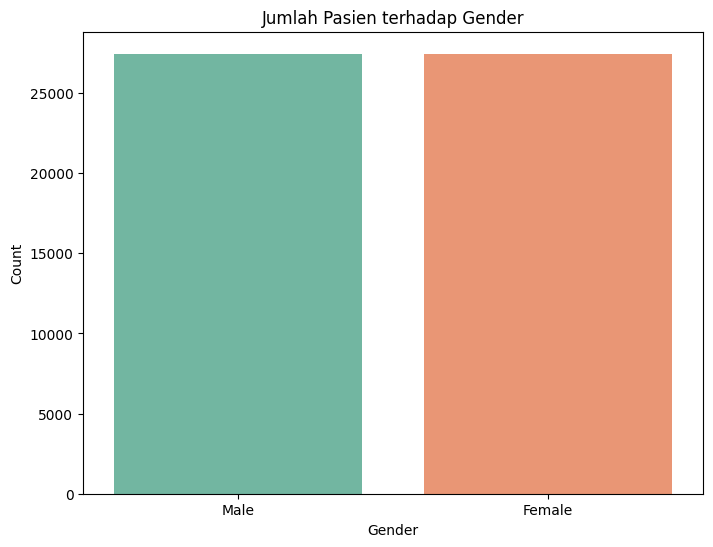

In [54]:
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns
# Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Gender', palette='Set2')
plt.title('Jumlah Pasien terhadap Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- Distribusi Kondisi Medis

<ipython-input-55-887fe7b6c1d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, y='Medical Condition', palette='viridis')


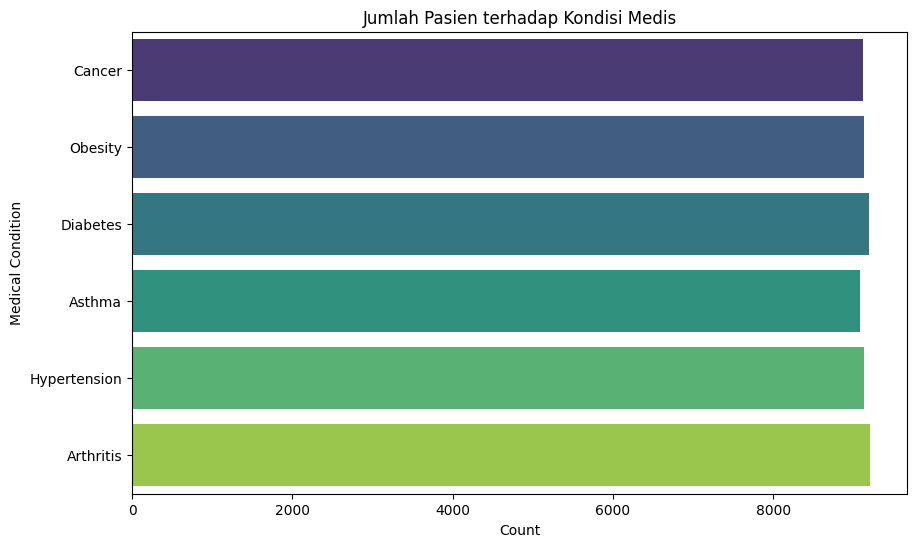

In [55]:
# Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, y='Medical Condition', palette='viridis')
plt.title('Jumlah Pasien terhadap Kondisi Medis')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()

<ipython-input-56-d3159c92325e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Medical Condition Category', palette='viridis')


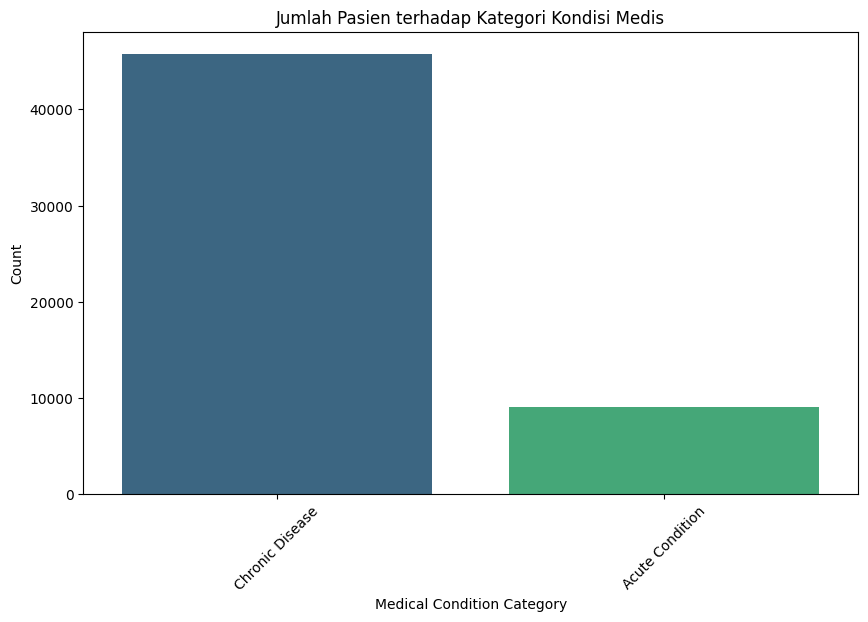

In [56]:
# Distribusi Kondisi Medis
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Medical Condition Category', palette='viridis')
plt.title('Jumlah Pasien terhadap Kategori Kondisi Medis')
plt.xlabel('Medical Condition Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- Distribusi Admission Type

<ipython-input-57-38506d58563f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Admission Type', palette='pastel')


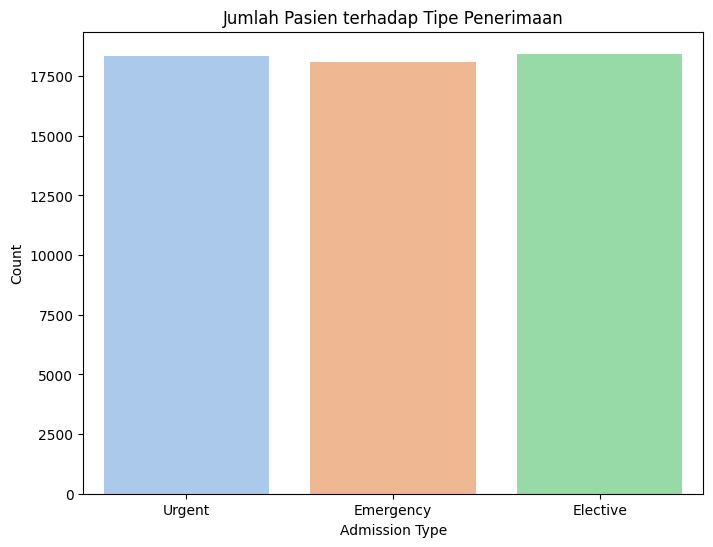

In [57]:
# Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Admission Type', palette='pastel')
plt.title('Jumlah Pasien terhadap Tipe Penerimaan')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

- Distribusi Age

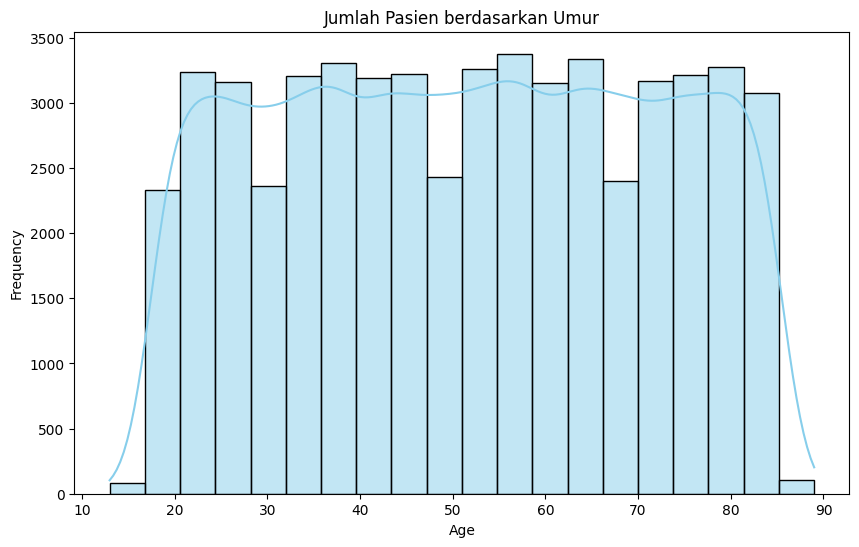

In [58]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], bins=20, kde=True, color='skyblue')
plt.title('Jumlah Pasien berdasarkan Umur')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-59-c1433351dc52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Age Category', palette='viridis')


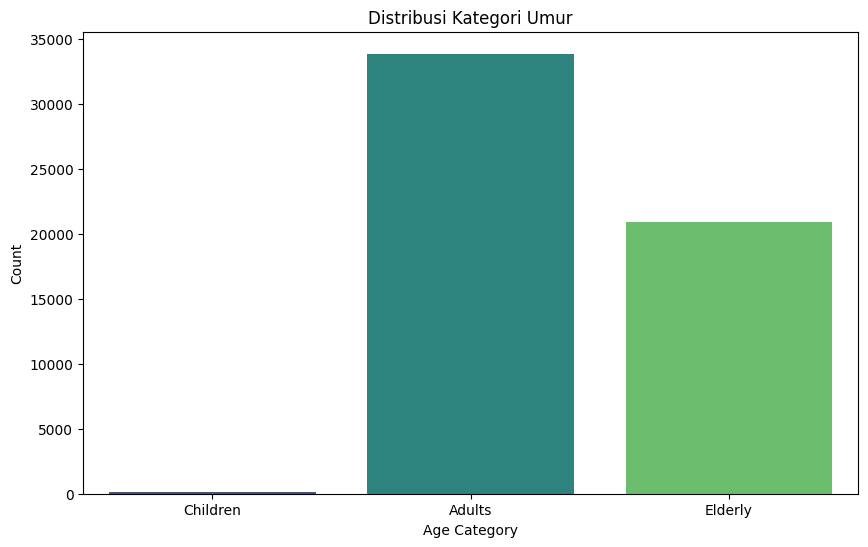

In [59]:
# Distribusi Age Category
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Age Category', palette='viridis')
plt.title('Distribusi Kategori Umur')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

- Distribusi Billing Amount

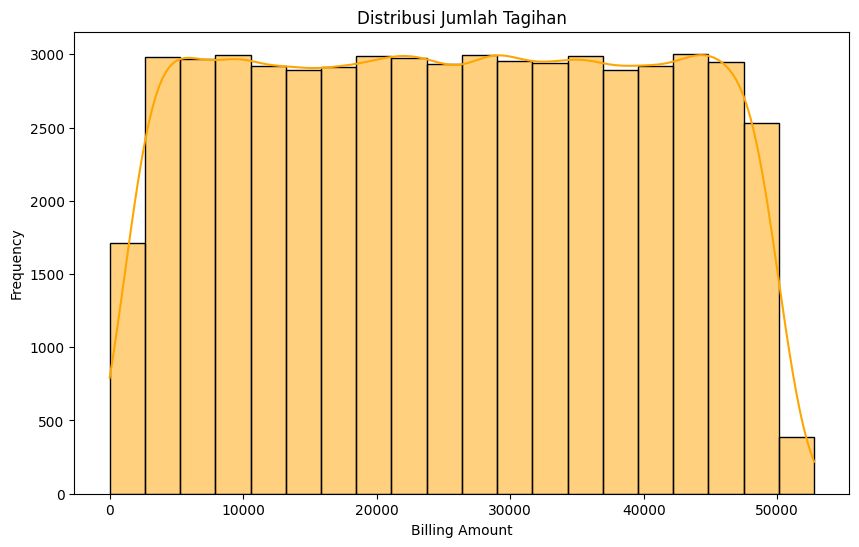

In [60]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Billing Amount'], bins=20, kde=True, color='orange')
plt.title('Distribusi Jumlah Tagihan')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

<ipython-input-61-d8a5e0cbb27b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Billing Amount Category', palette='viridis')


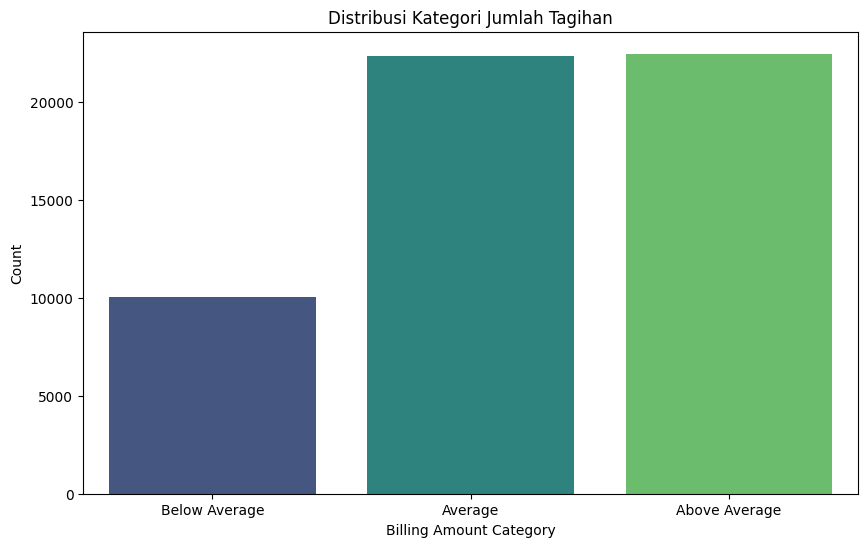

In [61]:
# Distribusi Billing Amount Category
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Billing Amount Category', palette='viridis')
plt.title('Distribusi Kategori Jumlah Tagihan')
plt.xlabel('Billing Amount Category')
plt.ylabel('Count')
plt.show()

### Visualisasi Data Berkelompok

- Hubungan Age Category dengan Medical Condition Category berdasarkan Gender

In [62]:
import plotly.express as px

# Visualisasi hubungan Age Category dengan Medical Condition Category berdasarkan Gender
fig_age_medical_condition = px.histogram(AHP, x='Age Category', color='Medical Condition Category',
                                         facet_col='Gender',
                                         color_discrete_sequence=px.colors.qualitative.Plotly,
                                         title='Age Category vs Medical Condition Category by Gender',
                                         labels={'Age Category': 'Age Category', 'Medical Condition Category': 'Medical Condition Category'},
                                         barmode='group')

fig_age_medical_condition.update_layout(
    xaxis_title='Age Category',
    yaxis_title='Count',
    width=1200,
    height=600
)

fig_age_medical_condition.show()


- Hubungan Medical Condition Category dengan Admission Type berdasarkan Age Category

In [63]:
fig_medical_condition_admission_type = px.histogram(AHP, x='Medical Condition Category', color='Admission Type',
                                                    facet_col='Age Category',
                                                    color_discrete_sequence=px.colors.qualitative.Plotly,
                                                    title='Medical Condition Category vs Admission Type by Age Category',
                                                    labels={'Medical Condition Category': 'Medical Condition Category', 'Admission Type': 'Admission Type'},
                                                    barmode='group')

fig_medical_condition_admission_type.update_layout(
    xaxis_title='Medical Condition Category',
    yaxis_title='Count',
    width=1200,
    height=600
)

fig_medical_condition_admission_type.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- Hubungan Billing Amount Category dengan Medical Condition Category berdasarkan Age Category

In [64]:
fig_billing_medical_condition = px.histogram(AHP, x='Billing Amount Category', color='Medical Condition Category',
                                             facet_col='Age Category',
                                             color_discrete_sequence=px.colors.qualitative.Plotly,
                                             title='Billing Amount Category vs Medical Condition Category by Age Category',
                                             labels={'Billing Amount Category': 'Billing Amount Category', 'Medical Condition Category': 'Medical Condition Category'},
                                             barmode='group')

fig_billing_medical_condition.update_layout(
    xaxis_title='Billing Amount Category',
    yaxis_title='Count',
    width=1200,
    height=600
)

fig_billing_medical_condition.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- Hubungan Condition Category dengan Billing Amount Category berdasarkan Medical Admission Type

In [65]:
fig_condition_billing = px.histogram(AHP, x='Medical Condition Category', color='Billing Amount Category',
                                     facet_col='Admission Type',
                                     color_discrete_sequence=px.colors.qualitative.Plotly,
                                     title='Medical Condition Category vs Billing Amount Category by Admission Type',
                                     labels={'Medical Condition Category': 'Medical Condition Category', 'Billing Amount Category': 'Billing Amount Category'},
                                     barmode='group')

fig_condition_billing.update_layout(
    xaxis_title='Medical Condition Category',
    yaxis_title='Count',
    width=1200,
    height=600
)

fig_condition_billing.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Visualisasi Perhitungan AHP

- Kriteria

In [66]:
import plotly.express as px

# Membuat bar chart untuk Bobot Kriteria
fig = px.bar(
    bobot.drop_duplicates(subset=['Kriteria']).reset_index(drop=True),
    x='Kriteria',
    y='Bobot',
    title='Bobot Kriteria',
    labels={'Kriteria': 'Kriteria', 'Bobot': 'Bobot'},
    color='Bobot',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_layout(
    xaxis_title='Kriteria',
    yaxis_title='Bobot',
    width=800,
    height=400
)

fig.show()

- Sub Kriteria

In [67]:
import plotly.express as px

# Membuat bar chart untuk Bobot Sub Kriteria
fig = px.bar(bobot, x='Sub Kriteria', y='Bobot Sub Kriteria', color='Kriteria',
             title='Bar Chart Bobot Sub Kriteria Berdasarkan Kriteria',
             labels={'Sub Kriteria': 'Sub Kriteria', 'Bobot Sub Kriteria': 'Bobot Sub Kriteria'},
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(
    xaxis_title='Sub Kriteria',
    yaxis_title='Bobot Sub Kriteria',
    width=1200,
    height=600
)

fig.show()


In [68]:
import plotly.express as px

# Membuat treemap untuk Bobot Kriteria dan Sub Kriteria
fig = px.treemap(bobot, path=['Kriteria', 'Sub Kriteria'], values='Bobot Sub Kriteria',
                 title='Treemap Bobot Sub Kriteria Berdasarkan Kriteria',
                 color='Bobot Sub Kriteria',
                 color_continuous_scale='Viridis')

# Menambahkan keterangan bobot
for i in fig.data:
    i.textinfo = 'label+value'
    i.textposition = 'middle center'

fig.update_layout(
    width=1200,
    height=600
)

fig.show()

- Skor Prioritas ICU

In [69]:
AHP['ICU Priority Score'].value_counts()

ICU Priority Score
0.538001    3967
0.555313    3892
0.428291    3858
0.410979    3804
0.586662    3777
0.459639    3762
0.393202    2415
0.471564    2397
0.344541    2375
0.488876    2362
0.361853    2361
0.520225    2323
0.317822    1775
0.366483    1725
0.335134    1722
0.268697    1092
0.300046    1055
0.251385    1025
0.376779     827
0.521113     773
0.552462     760
0.394091     749
0.503801     736
0.425439     719
0.310341     500
0.486025     493
0.327653     485
0.454676     481
0.359002     469
0.437364     440
0.300934     339
0.283622     337
0.332283     314
0.217185     220
0.265845     210
0.234497     205
0.467075      19
0.435726      14
0.418414      14
0.340052      13
0.291391      11
0.308703      10
0.246896       8
0.198235       5
0.432875       5
0.401526       4
0.384214       3
0.274503       2
0.181347       2
0.305852       2
0.215547       2
0.257191       1
0.212695       1
Name: count, dtype: int64

In [70]:
import plotly.express as px

# Membuat visualisasi histogram untuk Skor Prioritas ICU
fig_icu_priority = px.histogram(AHP, x='ICU Priority Score',
                                title='Distribusi Skor Prioritas ICU',
                                labels={'ICU Priority Score': 'Skor Prioritas ICU'},
                                color_discrete_sequence=['skyblue'])

# Mengatur tata letak dan label
fig_icu_priority.update_layout(
    xaxis_title='Skor Prioritas ICU',
    yaxis_title='Jumlah Pasien',
    width=1200,
    height=600
)

# Menampilkan grafik
fig_icu_priority.show()

- **Skor Prioritas Kategori**

In [71]:
AHP['ICU Priority Category'].value_counts()

ICU Priority Category
Prioritas           27188
Sangat Prioritas    15492
Tidak Prioritas     12180
Name: count, dtype: int64

In [72]:
import plotly.express as px

# Menghitung jumlah kategori prioritas
priority_counts = AHP['ICU Priority Category'].value_counts().reset_index()
priority_counts.columns = ['ICU Priority Category', 'Count']

# Membuat bar chart untuk Kategori Prioritas ICU
fig = px.bar(priority_counts, x='ICU Priority Category', y='Count',
             title='Jumlah Kategori Prioritas ICU',
             labels={'ICU Priority Category': 'Kategori Prioritas ICU', 'Count': 'Jumlah'},
             color='ICU Priority Category',
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(
    xaxis_title='Kategori Prioritas ICU',
    yaxis_title='Jumlah',
    width=800,
    height=400
)

fig.show()

## **Kesimpulan Proyek DSS Menggunakan AHP untuk Prioritas Pasien ICU**

Proyek ini mengimplementasikan **Analytic Hierarchy Process (AHP)** untuk menentukan prioritas pasien di Unit Perawatan Intensif (ICU). AHP digunakan karena kemampuannya menangani masalah pengambilan keputusan yang melibatkan berbagai kriteria dan sub-kriteria, yang sangat penting dalam situasi kritis seperti penentuan prioritas perawatan pasien.

**Kesimpulan utama dari proyek ini mencakup beberapa poin penting:**

1. **Relevansi dan Kesesuaian Metode AHP**:
   - AHP telah terbukti sebagai metode yang sesuai untuk memecahkan masalah eksekutif dalam pengambilan keputusan di sektor kesehatan. Proyek ini memanfaatkan AHP untuk membobot dan memprioritaskan kriteria seperti kondisi klinis pasien, usia, komorbiditas, dan ketersediaan sumber daya, sehingga menghasilkan keputusan yang lebih objektif dan terstruktur.

2. **Langkah-Langkah Proyek yang Sistematis**:
   - **Pengenalan dan Tujuan**: Proyek ini dimulai dengan identifikasi masalah utama, yaitu bagaimana menentukan prioritas pasien ICU dengan cara yang transparan dan dapat dipertanggungjawabkan.
   - **Pengumpulan dan Pra-Pemrosesan Data**: Data yang digunakan berasal dari sumber yang relevan dan telah diproses dengan baik, memastikan keakuratan dan kelengkapan informasi yang diperlukan untuk perhitungan AHP.
   - **Analisis Data (EDA)**: Analisis data eksploratif memberikan pemahaman mendalam mengenai pola dan karakteristik data yang kemudian digunakan sebagai dasar untuk pengembangan model AHP.
   - **Pengembangan Model AHP**: Model AHP dikembangkan melalui pembobotan kriteria yang relevan. Setiap kriteria diberi bobot sesuai dengan tingkat kepentingannya, yang kemudian digunakan untuk menghitung **ICU Priority Score** bagi setiap pasien. Alur perhitungan ini melibatkan:
     - Penentuan kriteria dan sub-kriteria.
     - Pembobotan kriteria berdasarkan tingkat kepentingannya.
     - Penggunaan matriks perbandingan berpasangan untuk menentukan bobot relatif.
     - Penghitungan skor prioritas untuk setiap pasien berdasarkan bobot kriteria yang telah ditentukan.
   - **Pengkategorian Prioritas**: Berdasarkan skor yang dihasilkan, pasien dikategorikan ke dalam tiga tingkat prioritas: **Sangat Prioritas**, **Prioritas**, dan **Tidak Prioritas**. Kategori ini memungkinkan pengambil keputusan untuk segera mengetahui pasien mana yang harus mendapatkan perawatan intensif lebih dahulu.
   - **Visualisasi dan Interpretasi**: Hasil perhitungan AHP divisualisasikan untuk memudahkan pemahaman mengenai prioritas pasien. Visualisasi ini membantu dalam menampilkan skor dan kategori prioritas dengan cara yang intuitif.

3. **Hasil yang Didapat**:
   - Hasil dari model AHP menunjukkan bahwa beberapa pasien dengan kondisi tertentu memperoleh skor prioritas lebih tinggi, yang artinya mereka harus diprioritaskan untuk perawatan ICU. Model ini juga berhasil membedakan pasien berdasarkan tingkat urgensinya, yang memungkinkan alokasi sumber daya medis yang lebih efisien.
   - Pengkategorian yang dilakukan juga terbukti efektif dalam membantu manajemen rumah sakit dalam pengambilan keputusan secara cepat dan tepat.

4. **Penerapan dalam Pengambilan Keputusan Nyata**:
   - Proyek ini memperlihatkan bagaimana AHP dapat diterapkan dalam skenario dunia nyata untuk mendukung keputusan yang berdampak besar pada keselamatan pasien. Dengan adanya model ini, proses pengambilan keputusan di ICU dapat dilakukan dengan lebih transparan dan dapat dipertanggungjawabkan.

5. **Keterpaduan dan Implementasi Teknologi**:
   - Teknologi yang digunakan dalam proyek ini, terutama Python dan library pendukungnya, berhasil mendukung seluruh tahapan proyek, dari pemrosesan data hingga pengembangan model dan visualisasi hasil. Ini memastikan bahwa proyek dapat direplikasi, dikembangkan lebih lanjut, dan diintegrasikan ke dalam sistem manajemen rumah sakit.


Secara keseluruhan, proyek ini berhasil mencapai tujuannya dalam menyediakan alat bantu pengambilan keputusan yang efektif dan efisien untuk menentukan prioritas pasien ICU. Penggunaan AHP dalam proyek ini telah memberikan hasil yang signifikan, dengan alur perhitungan yang jelas dan pengkategorian prioritas yang membantu dalam pengambilan keputusan yang cepat dan tepat di lingkungan rumah sakit.